# Telco Customer Churn
### By Erni Nur Pratiwi

# 1. Introduction
## Business Problem Understanding

**Context** 

Sebuah perusahaan telekomunikasi menghadapi tantangan dalam mempertahankan pelanggannya. Dalam industri telekomunikasi, churn adalah situasi di mana pelanggan berhenti menggunakan layanan yang disediakan oleh perusahaan. Data ini terdiri dari berbagai fitur pelanggan seperti durasi berlangganan, jenis layanan yang digunakan, dan biaya bulanan. Informasi ini penting untuk menganalisis alasan-alasan pelanggan berhenti berlangganan dan membantu perusahaan dalam mengembangkan strategi untuk meningkatkan retensi pelanggan.


**Problem Statement**

Perusahaan telekomunikasi mengalami tingkat churn pelanggan yang tinggi, yang berpotensi mengurangi pendapatan dan menghambat pertumbuhan bisnis. Masalah ini membutuhkan identifikasi faktor-faktor yang menyebabkan churn sehingga perusahaan dapat mengambil tindakan yang tepat untuk menguranginya. Memahami faktor-faktor ini akan membantu perusahaan dalam merancang program retensi pelanggan yang lebih efektif.

Dalam dunia bisnis, ada istilah Acquisition Cost dan Retention Cost. Acquisition Cost adalah biaya yang dikeluarkan oleh perusahaan untuk mendapatkan pembeli atau pelanggan baru. Retention Cost adalah biaya yang dikeluarkan oleh perusahaan untuk mempertahankan pelanggan yang ada.

Pada kenyataannya, kita sebagai manusia tidak dapat memprediksi pelanggan mana yang akan bertahan dan mana yang akan meninggalkan produk kita. Jika kita salah memprediksi pelanggan mana yang sebenarnya akan churn, tetapi kita yakin ia akan tetap bertahan, maka biaya yang dikeluarkan akan lebih besar. Beberapa sumber mengatakan bahwa biaya pengambilan lima kali lebih besar daripada biaya penanganan.


**Goals**
Tujuan dari analisis ini adalah:

- Karakteristik pelanggan yang meninggalkan layanan (`ya` Churn / kelas:1 )
- Prediksi peluang pelanggan untuk berhenti (Berhenti menggunakan layanan) 
- Strategi bagaimana mencegah pelanggan berpindah
- Faktor paling signifikan yang mempengaruhi pelanggan untuk churn

**Evaluation Metrics**

Dalam mengevaluasi kinerja model prediktif untuk dataset Telco Customer Churn, penting untuk mempertimbangkan jenis kesalahan yang dapat terjadi dan konsekuensinya. Berikut adalah penjelasan mengenai dua jenis kesalahan dan metrik evaluasi yang relevan:

**0:** Menunjukkan pelanggan yang tidak meninggalkan perusahaan. (`No` Churn) 

**1:** Menunjukkan pelanggan yang meninggalkan perusahaan. (Churn)

*Type 1 Error: False Positive*
- Definisi: 
    False Positive terjadi ketika model memprediksi bahwa seorang pelanggan akan churn (meninggalkan layanan),  padahal sebenarnya pelanggan tersebut tidak churn.
- Konsekuensi:
    - Biaya Perekutan: Perusahaan mungkin menghabiskan sumber daya untuk mencoba mempertahankan pelanggan yang sebenarnya tidak berencana untuk churn. Ini dapat mencakup biaya komunikasi, penawaran khusus, atau insentif lainnya.
    - Waktu dan Sumber Daya: Sumber daya manusia dan waktu yang dihabiskan untuk menangani pelanggan ini bisa sia-sia karena mereka sebenarnya tidak berisiko churn.

*Type 2 Error: False Negative*
- Definisi: 
    False Negative terjadi ketika model memprediksi bahwa seorang pelanggan tidak akan churn, padahal sebenarnya pelanggan tersebut akan churn.
- Konsekuensi:
    - Kehilangan Calon Potensial: Perusahaan kehilangan pelanggan yang sebenarnya berisiko churn. Ini bisa berdampak signifikan pada pendapatan dan pertumbuhan bisnis karena pelanggan tersebut mungkin membawa nilai jangka panjang yang besar bagi perusahaan.


Di bawah ini adalah simulasi kemungkinan akibat dari masing-masing jenis kesalahan dengan menggunakan referensi berikut :
- Median biaya bulanan sekitar $70 per pelanggan
- Rata-rata biaya akuisisi pelanggan untuk telekomunikasi di Amerika Serikat adalah $694

[source](https://firstpagesage.com/reports/average-customer-acquisition-cost-cac-by-industry-b2b-edition-fc/)

- Biaya retensi untuk perusahaan SaaS 4-5 kali lebih kecil dibandingkan CAC

[source](https://www.forbes.com/sites/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/?sh=2c41201c1c7d)

**Type 1 Error Simulation**

Retention Cost= ($694/4)= $173.5 Kerugian per Pelanggan

**Type 2 Error Simulation**

Recurring Revenue + Customer Acquisition Cost= ($70+ $694)= $764 Kerugian per Pelanggan

**Project Flowchart**
1. Introduction

1. Data Understanding

1. Data Wrangling

1. Data Preprocessing
    - MinMaxScaler : Menerapkan MinMaxScaler untuk menskalakan data numerik karena distribusinya tidak normal dan tidak ada outlier.
    - One-Hot Encoding : Menggunakan one-hot encoding untuk data kategoris guna mengubah kategori menjadi format numerik yang dapat digunakan dalam model kami.

1. Machine Learning Model Benchmark<br>

1. Final Model Evaluation

1. Conclusion & Recommendation

1. Deployment

# 2. Data Understanding

In [9]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, roc_auc_score, make_scorer, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import RFECV

# Importing Additional Libraries
import scipy.stats as stats
import joblib
import time
import shap

# Plotting Utilities
import seaborn as sns
import matplotlib.pyplot as plt

# a desperate attempt to remove all those spam outputs
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Load Dataset
df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [11]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


**Tabel Info**

In [13]:
print(f'df shape: {df.shape}')
pd.DataFrame(
    {
    'column': df.columns.values,
    'dtype': df.dtypes.values,
    'n_missing_values': df.isna().sum(),
    '%_missing_value': df.isna().sum()/df.shape[0] * 100,
    'neg_value': [int((df[col] < 0).sum()) if (df[col].dtype == int or df[col].dtype == float) else 0 for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique()[:10] for col in df.columns]
    }
)

df shape: (4930, 11)


,column,dtype,n_missing_values,%_missing_value,neg_value,n_unique,sample_unique
Dependents,Dependents,object,0,0.0,0,2,"[Yes, No]"
tenure,tenure,int64,0,0.0,0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47]"
OnlineSecurity,OnlineSecurity,object,0,0.0,0,3,"[No, Yes, No internet service]"
OnlineBackup,OnlineBackup,object,0,0.0,0,3,"[No, Yes, No internet service]"
InternetService,InternetService,object,0,0.0,0,3,"[DSL, Fiber optic, No]"
DeviceProtection,DeviceProtection,object,0,0.0,0,3,"[Yes, No internet service, No]"
TechSupport,TechSupport,object,0,0.0,0,3,"[Yes, No, No internet service]"
Contract,Contract,object,0,0.0,0,3,"[Month-to-month, Two year, One year]"
PaperlessBilling,PaperlessBilling,object,0,0.0,0,2,"[Yes, No]"
MonthlyCharges,MonthlyCharges,float64,0,0.0,0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


> Berdasarkan tabel di atas, kita dapat melihat bahwa tidak ada Missing Values di kolom

In [15]:
# Ubah nama fitur 'tenure' agar seragam dengan yang lain

df = df.rename(columns={'tenure': 'Tenure'})

In [16]:
df.columns

Index(['Dependents', 'Tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

## Cek Statistik Deskriptif
Tujuan Cek statistik deskriptif adalah untuk mengidentifikasi setiap anomali data

In [18]:
display(df.describe(), df.describe(include='object'))

,Tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Karena terdapat kesenjangan antara nilai rata-rata dan median pada kolom Tenure dan MonthlyCharges, kita dapat berasumsi bahwa fitur numerik ini memiliki distribusi yang tidak normal.

# EDA


## Cek Target Balance

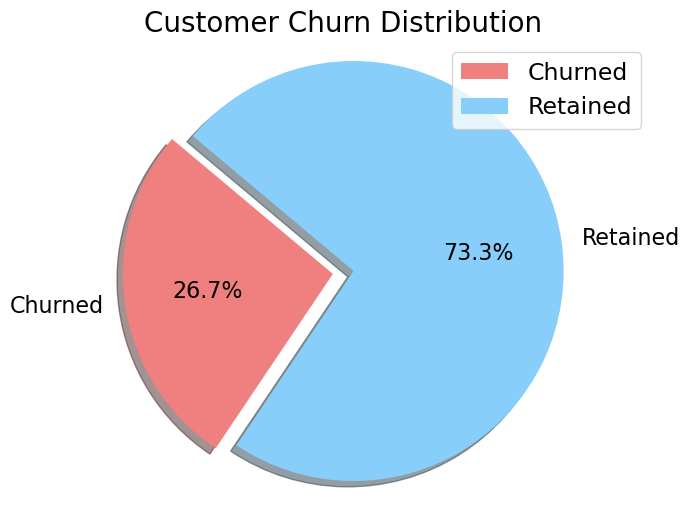

In [22]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100
churn_percentage = churn_counts[1]

labels = 'Churned', 'Retained'
sizes = [churn_percentage, 100 - churn_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
label_fontsize = 17  # Font size for labels
title_fontsize = 20  # Font size for title
autopct_fontsize = 16  # Font size for autopct

# Custom autopct function to control font size
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: custom_autopct(pct),
        shadow=True, startangle=140, textprops={'fontsize': autopct_fontsize})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Churn Distribution', fontsize=title_fontsize)
plt.legend(labels, loc="best", fontsize=label_fontsize)
plt.show()

Data Imbalanced, sehingga diperlukan pemodelan machine learning untuk menangani ketidakseimbangan. Kami akan menganalisis fitur lainnya lebih lanjut dengan membandingkannya dengan persentase churn.

### Distribution Analysis

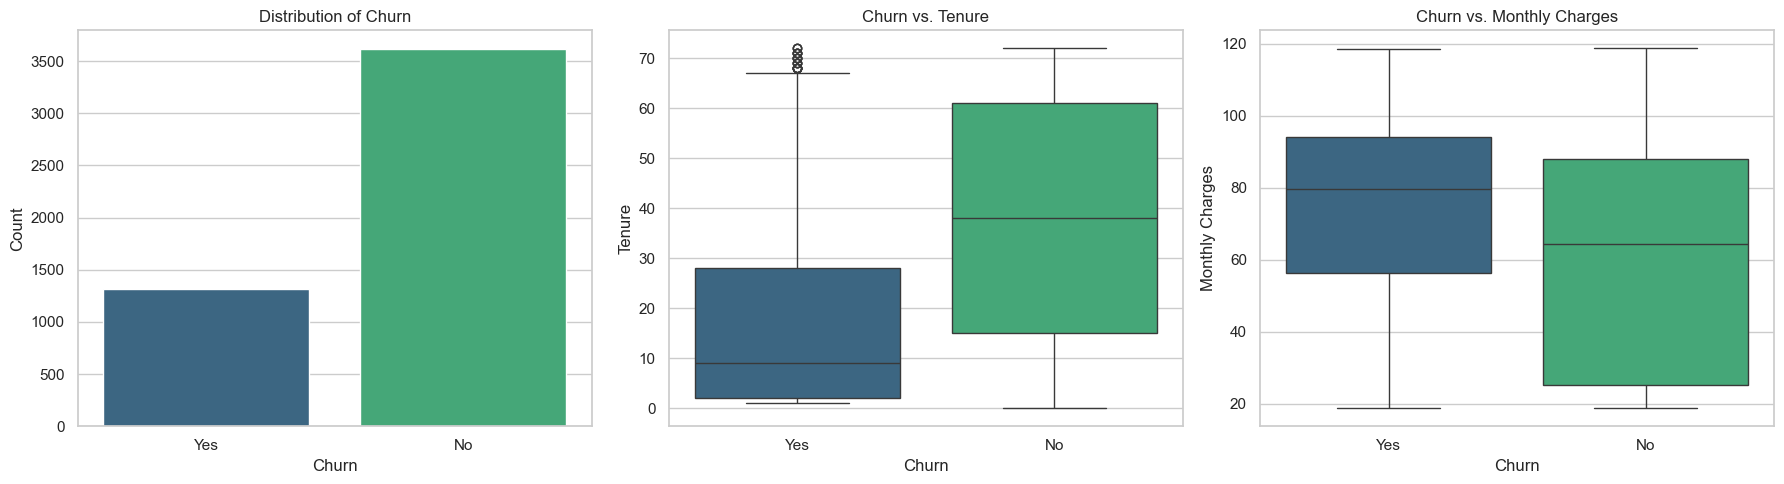

,Churn,Tenure,MonthlyCharges
Churn,1.000000,-0.362734,0.193099
Tenure,-0.362734,1.000000,0.240244
MonthlyCharges,0.193099,0.240244,1.000000


In [25]:
# Setting the seaborn style for the plots
sns.set(style="whitegrid")

# Distribution of Churn
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Churn vs. Tenure
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='Tenure', data=df, palette='viridis')
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')

# Churn vs. Monthly Charges
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

# Calculating correlation of 'Churn' with numerical variables
# Converting 'Churn' to a numerical value for correlation calculation
data_corr = df.copy()
data_corr['Churn'] = data_corr['Churn'].map({'Yes': 1, 'No': 0})
correlation = data_corr[['Churn', 'Tenure', 'MonthlyCharges']].corr()

correlation


>Berdasarkan grafik ` Churn vs Tenure` di atas, pelanggan yang berhenti berlangganan terjadi ketika mereka baru mulai berlangganan. 

>Berdasarkan grafik ` Churn vs Biaya bulanan` di atas, pelanggan yang berhenti berlangganan terjadi ketika `MonthlyCharges` relatif mahal

### Percentage of Churn by Monthly Charge Ranges and Tenure

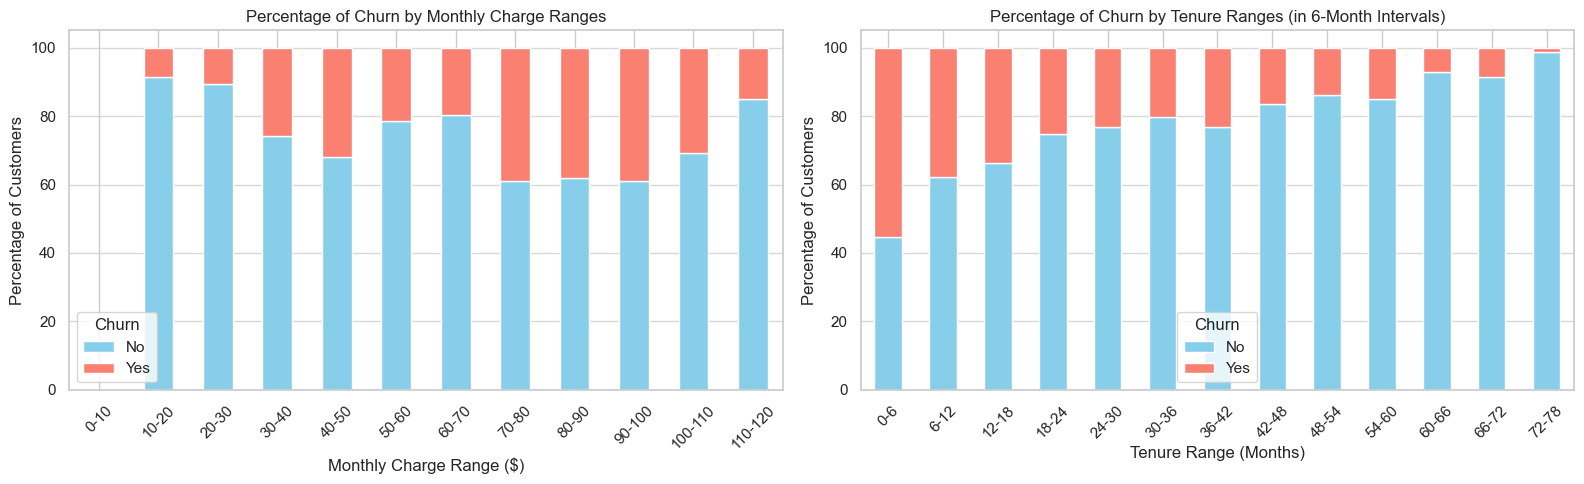

In [28]:
# Creating bins for Monthly Charges and Tenure
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
bin_labels = [f"{i}-{i + 10}" for i in bins[:-1]]
tenure_bins = [0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 78]
tenure_bin_labels = [f"{i}-{i + 6}" for i in tenure_bins[:-1]]

# Re-assigning the MonthlyChargeBin and TenureBin columns with correct labels
df1 = df.copy()  # Resetting to the original dataset
df1['MonthlyChargeBin'] = pd.cut(df1['MonthlyCharges'], bins=bins, labels=bin_labels, right=False)
df1['TenureBin'] = pd.cut(df1['Tenure'], bins=tenure_bins, labels=tenure_bin_labels, right=False)

# Regrouping data for both Monthly Charges and Tenure
grouped_monthly_data = df1.groupby(['MonthlyChargeBin', 'Churn']).size().unstack(fill_value=0)
grouped_monthly_data_percentage = grouped_monthly_data.div(grouped_monthly_data.sum(axis=1), axis=0) * 100

grouped_tenure_data = df1.groupby(['TenureBin', 'Churn']).size().unstack(fill_value=0)
grouped_tenure_data_percentage = grouped_tenure_data.div(grouped_tenure_data.sum(axis=1), axis=0) * 100

# Plotting both histograms as subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Monthly Charges subplot
grouped_monthly_data_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_title('Percentage of Churn by Monthly Charge Ranges')
axes[0].set_xlabel('Monthly Charge Range ($)')
axes[0].set_ylabel('Percentage of Customers')
axes[0].legend(title='Churn', labels=['No', 'Yes'])
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.75)

# Tenure subplot
grouped_tenure_data_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=axes[1])
axes[1].set_title('Percentage of Churn by Tenure Ranges (in 6-Month Intervals)')
axes[1].set_xlabel('Tenure Range (Months)')
axes[1].set_ylabel('Percentage of Customers')
axes[1].legend(title='Churn', labels=['No', 'Yes'])
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


> Churn Berdasarkan Biaya Bulanan

1. **Kisaran Harga Menengah hingga Tinggi:** Tingkat churn yang lebih tinggi diamati, yang menunjukkan pelanggan dalam kisaran $70-$100 mungkin beralih karena nilai yang dianggap lebih rendah atau penawaran yang kompetitif.

2. **Kurung Harga Terendah dan Tertinggi:** Tingkat churn yang lebih rendah menunjukkan basis pelanggan yang loyal

3. **Stabilitas dalam Kisaran Harga yang Lebih Rendah:** Pelanggan yang membayar hingga $60 menunjukkan churn yang lebih rendah, kemungkinan puas dengan layanan dasar atau harga sedang.

> Churn Berdasarkan Masa Berlaku

1. **Churn Masa Berlaku Awal**: Churn yang lebih tinggi dalam 12 bulan pertama menunjukkan pelanggan baru lebih mungkin untuk pergi, mungkin karena harapan yang tidak terpenuhi atau penawaran pesaing yang lebih baik.

2. **Churn yang Berkurang dengan Masa Berlaku yang Lebih Lama**: Tingkat churn menurun seiring dengan peningkatan masa berlaku, yang menunjukkan bahwa pelanggan jangka panjang cenderung lebih loyal dan puas.

3. **Loyalitas pada Pelanggan Jangka Panjang**: Tingkat pergantian pelanggan yang sangat rendah dengan masa berlangganan lebih dari 60 bulan menunjukkan basis pelanggan yang kuat, loyal, dan puas.

# 3. Data Wrangling
Karena tidak ada outlier dan missing value, pengelolaan data dalam proyek ini akan difokuskan pada penanganan data duplikat.

## Handling Duplicate Data

In [32]:
print ('n duplicate =', df.duplicated().sum(), '\n')           # Check Duplicate Data
print('percentage', df['Churn'].value_counts() / len(df) * 100)            # Percentage of the "target" before dropping duplicated data

n duplicate = 77 

percentage Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64


In [33]:
df = df.drop_duplicates(keep='first')                                                  # Drop Duplicate Data
print ('n duplicate =', df.duplicated().sum(), '\n')           # Check Duplicate Data
print('percentage', df['Churn'].value_counts() / len(df) * 100)            # Percentage of the "target" before dropping duplicated data

n duplicate = 0 

percentage Churn
No     73.459716
Yes    26.540284
Name: count, dtype: float64


> Menghapus data Duplikat tidak mempengaruhi persentase fitur `target` karena persentasenya rendah

# 4. Data PreProcessing

## Encoding:

Untuk mengodekan fitur kategoris, kami akan menggunakan metode One Hot Encoding pada kolom **'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', dan 'Churn'**. One Hot Encoding cocok di sini karena:

1. Fitur-fitur ini bersifat non-ordinal, artinya tidak ada urutan yang berarti di antara kategori-kategori dalam fitur-fitur tersebut.

2. Jumlah nilai unik (data unik) dalam setiap fitur terbatas.

Dalam One Hot Encoding, setiap kategori dalam suatu fitur diubah menjadi kolom baru, dan setiap baris diberi nilai 1 atau 0, tergantung pada apakah kategori tersebut muncul dalam baris tersebut atau tidak. Proses ini efektif untuk model pembelajaran mesin yang mungkin kesulitan memahami hubungan dalam data kategoris.

---

## Scaler:

MinMaxScaler dipilih untuk menskalakan fitur Tenure dan MonthlyCharges karena distribusinya yang tidak normal dan tidak adanya outlier. Scaler ini efektif dalam skenario seperti itu karena secara linear mengubah data dengan menskalakan setiap fitur ke rentang tertentu, biasanya antara 0 dan 1. Dengan demikian, ia mempertahankan bentuk distribusi kumpulan data dan tidak mendistorsi jarak relatif antara nilai-nilai. Pendekatan ini sangat bermanfaat ketika berhadapan dengan fitur-fitur yang tidak sesuai dengan distribusi normal dan bebas dari distorsi nilai ekstrem seperti outlier.

In [37]:
# Identify numerical and categorical columns
numerical_features = ['Tenure', 'MonthlyCharges']
categorical_features = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                        'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

# Preprocessing for numerical data (Feature Scaling)
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Tenure', 'MonthlyCharges']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'InternetService',
                                  'DeviceProtection', 'TechSupport', 'Contract',
                                  'PaperlessBilling'])])

## Splitting Data

In [39]:
# Separate target variable and features
X = df.drop(columns='Churn')
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Make binary for Churn

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# We use test size 10:90 for better analysis. It does give more risk for overfitting, but it is still manageable

# Display only the first 5 rows of the DataFrame
pd.DataFrame(X).head(10)

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60
5,Yes,40,No,No,DSL,Yes,No,Month-to-month,Yes,74.55
6,No,17,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.70
7,No,11,No,No,DSL,No,No,Month-to-month,Yes,44.05
8,No,8,No,No,Fiber optic,No,No,Month-to-month,Yes,73.50
9,Yes,47,Yes,No,DSL,Yes,Yes,One year,No,40.30


In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4367, 10), (486, 10), (4367,), (486,))

## multicolinearity check

In [42]:
# Check VIF Numerical on DF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


def calc_vif(x):

    vif = pd.DataFrame()
    vif['variables'] = x.columns    #_
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 10, 'Yes', 'No')

    return (vif)

calc_vif(df[['Tenure', 'MonthlyCharges']])


,variables,VIF,Acceptable
0,Tenure,2.630097,Yes
1,MonthlyCharges,2.630097,Yes


Dari gambar di atas, Variance Inflation Factor (VIF) digunakan untuk mengukur multikolinearitas. Sebagian besar variabel, termasuk yang mewakili masa kerja, durasi kontrak, tanggungan, keamanan daring, dan layanan internet, menunjukkan multikolinearitas yang dapat diterima, yang menunjukkan bahwa variabel tersebut cocok untuk digunakan dalam model tanpa menimbulkan kekhawatiran yang tidak semestinya. Namun, bagian 'MonthlyCharges' dari data tersebut sedikit berbeda. Data tersebut menunjukkan bahwa data tersebut mungkin tumpang tindih dengan beberapa informasi lainnya. Meskipun ini tidak ideal, 'MonthlyCharges' juga merupakan bagian informasi yang sangat penting—informasi tersebut memberi tahu kita berapa banyak yang dibayarkan pelanggan setiap bulan, yang merupakan hal penting ketika kita mencoba memprediksi apakah mereka akan tetap menggunakan layanan tersebut atau meninggalkannya. Karena informasi tersebut sangat penting, kita mungkin memutuskan untuk tetap menggunakannya dalam model. Kita hanya perlu memastikan bahwa kita memeriksa model kita dengan saksama untuk memastikan bahwa tumpang tindih ini tidak menyebabkan masalah apa pun pada prediksi kita.

# 5. Model Benchmarking

Bab ini akan menganalisis dan menguji beberapa model secara mendalam hingga akhirnya menemukan model yang paling optimal dan ideal untuk tujuan Prediksi Klasifikasi. Di bawah ini adalah alur kerjanya sebagai berikut:

1. **Model Evaluation Weight:** Bagian ini akan membahas skor mana yang paling harus kita fokuskan dan alasan yang mendasarinya terkait dengan tujuan bisnisnya
2. **Model Benchmarking (K-Fold):** Uji model benchmark default dengan K-fold untuk melihat ROC AUC, F2 dan setiap Standar Deviasi.
3. **Model Benchmarking (Data Test):** Test models dengan dataset untuk mempersempit pilihan model ideal
4. **Resampling Model:** Menggunakan metode Oversampling untuk menyeimbangkan kumpulan data yang tidak seimbang dari pesaing model ideal untuk mendapatkan keluaran yang lebih baik
5. **Hyperparameter Tuning and Ensemble:** Hyper Tune pesaing model yang diambil sampelnya ulang dan Ensemble berdiri sendiri untuk mendapatkan hasil yang lebih baik
6. **Report and Confusion Metric:** Report Klasifikasi dan Metrik Kebingungan untuk Model Akhir kami untuk menunjukkan dampaknya terhadap pernyataan masalah bisnis kami

### 5.1 Model Evaluation Weight

Untuk evaluasi model klasifikasi, ada beberapa metrik yang perlu dipertimbangkan, namun metrik mana yang harus kita fokuskan bergantung pada konteks spesifik masalah kita dan apa yang paling penting bagi kita atau pemangku kepentingan kita.


**Type 1 Error Simulation (False Positive)** : $173.5 Loss per Customer

**Type 2 Error Simulation (False Negative)** : $764 Loss per Customer

Berdasarkan konsekuensinya, tujuan kami adalah mengembangkan model yang dapat secara efektif mengurangi churn pelanggan bagi perusahaan, terutama dengan meminimalkan jumlah false negative (pelanggan yang benar-benar churn namun diperkirakan tidak akan churn).
Karena bobot kerugian **False Negative** jauh lebih besar daripada False Positive, sebaiknya kita paling fokus pada `Recall` dan `F2 Score`. Bukan berarti kami mengabaikan skor evaluasi lainnya sama sekali, namun 2 skor tersebut yang akan menjadi prioritas kami.

# F2 score coding formula
f2_score = make_scorer(fbeta_score, beta=2)

Skor F-beta mencapai nilai terbaiknya pada angka 1 dan terburuk pada angka 0. Nilai beta yang lebih tinggi akan memberikan bobot recall yang lebih kuat, sedangkan nilai yang lebih rendah akan memberi bobot pada presisi yang lebih kuat. Itu sebabnya kami menggunakan F2 daripada F1, karena kami lebih menghargai `Recall` daripada `Precision`

### 5.1 Model Benchmarking (K-Fold)

Kode ini mengevaluasi beberapa model pembelajaran mesin pada kumpulan data tertentu menggunakan validasi silang bertingkat. Ia menggunakan beberapa pengklasifikasi dan mengevaluasinya berdasarkan skor ROC AUC dan skor F2. Hasilnya kemudian dikompilasi ke dalam DataFrame untuk memudahkan perbandingan.

**Cross-Validation**

1. **Stratified K-Fold Cross-Validation**: Hal ini memastikan bahwa setiap lipatan memiliki proporsi label kelas yang sama, yang penting untuk kumpulan data yang tidak seimbang.
2. **Imbalanced Pipeline**: Pipeline pembelajaran yang tidak seimbang `ImbPipeline` dibuat dengan langkah prapemrosesan dan model saat ini.
3. **Cross-Validation**: Fungsi `cross_validate` mengevaluasi model menggunakan pipeline dan lipatan bertingkat, memberikan skor berdasarkan ROC AUC dan skor F2. Hasilnya disimpan dalam daftar.


In [52]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier


logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)  # Enable probability estimates for SVM
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42,verbose=-100)
qda = QuadraticDiscriminantAnalysis()
nb = GaussianNB()

models = [logreg, knn, dt, rf, xgb, lgbm, gb, svm, qda, nb]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'SVM', 'QDA', 'Naive Bayes']

roc_auc_scores = []
f2_scores = []
mean_roc_aucs = []
mean_f2s = []
std_roc_aucs = []
std_f2s = []

# Custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# Evaluate each model using StratifiedKFold cross-validation
for model in models:
    skfold = StratifiedKFold(n_splits=5)
    estimator = ImbPipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    scores = cross_validate(estimator, X_train, y_train, cv=skfold, scoring={'roc_auc': 'roc_auc', 'f2': f2_scorer})
    roc_auc_scores.append(scores['test_roc_auc'])
    f2_scores.append(scores['test_f2'])
    mean_roc_aucs.append(scores['test_roc_auc'].mean())
    mean_f2s.append(scores['test_f2'].mean())
    std_roc_aucs.append(scores['test_roc_auc'].std())
    std_f2s.append(scores['test_f2'].std())

results_df_kfold = pd.DataFrame({
    'Model': model_names,
    'Mean ROC AUC': mean_roc_aucs,
    'ROC AUC Std Dev': std_roc_aucs,
    'Mean F2 Score': mean_f2s,
    'F2 Score Std Dev': std_f2s
})

# Sort the results by mean F2 Score in descending order
results_df_sorted_kfold = results_df_kfold.set_index('Model').sort_values(by='Mean F2 Score', ascending=False)

results_df_sorted_kfold


,Mean ROC AUC,ROC AUC Std Dev,Mean F2 Score,F2 Score Std Dev
Model,,,,
Naive Bayes,0.818114,0.020804,0.723630,0.021633
Logistic Regression,0.839162,0.019680,0.541898,0.027184
Gradient Boosting,0.837491,0.020364,0.529443,0.028968
QDA,0.582447,0.068996,0.519918,0.086140
LightGBM,0.822266,0.019209,0.517149,0.014365
XGBoost,0.812819,0.016351,0.514059,0.018266
KNN,0.779220,0.017122,0.492179,0.015734
SVM,0.786382,0.016990,0.489919,0.019215
Decision Tree,0.652044,0.008629,0.478786,0.013262


Dari perspektif Hyperparameter default, **Naive Bayes** memenangkan perbandingan dari skor `F2`. Dan trade-off antara `ROC AUC`-nya dengan yang lain tidak terlalu signifikan. Sekarang mari kita uji data dan lihat apakah **Naive Bayes** masih memiliki `F2` terbaik dari semuanya

### 5.2 Model Benchmarking (Data Test)

Kode ini melatih setiap pipeline, mengevaluasi performanya, dan menentukan model terbaik berdasarkan F2 score. Kode ini melakukan tugas serupa dengan yang sebelumnya tetapi dengan beberapa perbedaan. Berikut perbedaannya dibandingkan kode sebelumnya:

- **Cross-Validation**: Kode sebelumnya menggunakan validasi silang K-fold bertingkat untuk mengevaluasi model, sedangkan kode saat ini membagi data menjadi satu set pelatihan dan pengujian.
- **Evaluation Function**: Kode saat ini menggunakan fungsi `train_and_evaluate` untuk merangkum logika pelatihan dan evaluasi untuk setiap model, sedangkan kode sebelumnya menggunakan `cross_validate`.

**Summary**
- Kode saat ini lebih sederhana dan berfokus pada evaluasi model pada satu rangkaian pelatihan/pengujian menggunakan alur, yang mencakup langkah-langkah pre-processing. Kode ini tidak menggunakan cross validation, sehingga berpotensi lebih cepat namun kurang kuat dibandingkan kode sebelumnya.
- Kode sebelumnya lebih ketat dengan cross validation, memberikan perkiraan kinerja yang lebih andal tetapi dengan mengorbankan waktu komputasi yang lebih lama.



In [56]:
def train_and_evaluate(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate F2 score
    f2 = fbeta_score(y_test, y_pred, beta=2)
    
    # Calculate ROC AUC score
    if hasattr(model, "predict_proba"):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"  # Some models might not have predict_proba method
    
    print(f"{model_name} Report:\n", report)
    print(f"F2 Score: {f2}")
    print(f"ROC AUC Score: {roc_auc}")
    
    return model_name, accuracy, report, f2, roc_auc

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),  # Enable probability estimates for SVM
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-100),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
results = []
for model_name, model in models.items():
    result = train_and_evaluate(model, model_name)
    results.append(result)

# Determine the best model based on F2
best_model_traintest = max(results, key=lambda item: item[3])
best_model_name, best_model_accuracy, best_model_report, best_model_f2, best_model_roc_auc = best_model_traintest

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy}")
print(f"Classification Report:\n{best_model_report}")
print(f"F2 Score: {best_model_f2}")
print(f"ROC AUC Score: {best_model_roc_auc}")


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       345
           1       0.68      0.45      0.54       141

    accuracy                           0.78       486
   macro avg       0.74      0.68      0.70       486
weighted avg       0.77      0.78      0.76       486

F2 Score: 0.48632218844984804
ROC AUC Score: 0.8511152225305787
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       345
           1       0.54      0.54      0.54       141

    accuracy                           0.73       486
   macro avg       0.68      0.68      0.68       486
weighted avg       0.73      0.73      0.73       486

F2 Score: 0.5397727272727273
ROC AUC Score: 0.6876349059512797
Random Forest Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       345
           1       0.62      0.49  

In [57]:
columns = ["Model", "Accuracy", "Classification Report", "F2 Score", "ROC AUC Score"]
df_results_bmtraintest = pd.DataFrame(results, columns=columns)

best_model_traintest = df_results_bmtraintest[df_results_bmtraintest['F2 Score'] == df_results_bmtraintest['F2 Score'].max()]
print("\nBest Model based on F2 Score:")
print(best_model_traintest)

df_sorted_bmtraintest = df_results_bmtraintest.drop(columns='Classification Report').sort_values(by='F2 Score', ascending=False)
df_sorted_bmtraintest



Best Model based on F2 Score:
         Model  Accuracy                              Classification Report  \
9  Naive Bayes  0.746914                precision    recall  f1-score   ...   

   F2 Score  ROC AUC Score  
9  0.740979       0.820979  


,Model,Accuracy,F2 Score,ROC AUC Score
9,Naive Bayes,0.746914,0.740979,0.820979
8,QDA,0.378601,0.621762,0.518286
6,LightGBM,0.783951,0.547337,0.844845
1,Decision Tree,0.734568,0.539773,0.687635
5,XGBoost,0.783951,0.523952,0.841340
2,Random Forest,0.765432,0.511111,0.824956
7,K-Nearest Neighbors,0.781893,0.499244,0.786628
0,Logistic Regression,0.779835,0.486322,0.851115
4,Gradient Boosting,0.767490,0.463526,0.851619
3,SVM,0.775720,0.428349,0.770367


Sekali lagi, **Naive Bayes** adalah model ideal dalam hal `F2 score` yang sangat penting untuk masalah bisnis kami karena `False Negative` kami memiliki dampak **5x lebih besar** daripada `False Positive`. Selain itu, skor `ROC AUC` sebesar 82% mencerminkan bahwa skor tersebut optimal dan cukup untuk membedakan dan mengenali antar kelas.Trade Off dengan model lain dalam hal skor lainnya tidak begitu penting.

Hal ini membawa kita ke titik di mana kita akan menggunakan **Naive Bayes** sebagai model default ideal kita saat ini.

NOTE : Kita perlu ingat bahwa **Naive Bayes** itu sendiri adalah standalone (Interpretable AI) dan bukan bentuk ansambel seperti **XGBoost** dan **LightGBM** (Explainable AI). Hal ini dapat berarti, meskipun saat ini **Naive Bayes** adalah model yang optimal, hal ini tidak berhenti sampai disitu saja. Karena kita tidak bisa melakukan Hyperparameter Tune **Naive Bayes** dan harus menggabungkannya dengan pengklasifikasi bertumpuk atau membuat pengklasifikasi voting, sementara model yang sudah menjadi ansambel sendiri bisa saja di-Hyperparameter Tuned secara default.

### 5.3 Resampling Model 

Kami akan mencoba perwakilan dari masing-masing model standalone terbaik dan model "ensemble by default" demi alur kerja dan efisiensi. Yaitu **Naive Bayes** dan **LightGBM** dari laporan kami sejauh ini.

##### **Light GBM Default**

In [64]:
# Initialize the model with default parameters
model_lgbm = LGBMClassifier(random_state=42,verbose=-100)

clf_lgbm_default = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_lgbm)
])

clf_lgbm_default.fit(X_train, y_train)

y_pred_lgbm_default = clf_lgbm_default.predict(X_test)
y_prob__lgbm_default = clf_lgbm_default.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbm_default))

f2 = fbeta_score(y_test, y_pred_lgbm_default, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob__lgbm_default)
print(f"ROC AUC: {roc_auc}")


              precision    recall  f1-score   support

           0       0.82      0.89      0.85       345
           1       0.66      0.52      0.58       141

    accuracy                           0.78       486
   macro avg       0.74      0.71      0.72       486
weighted avg       0.77      0.78      0.78       486

F2 Score: 0.5473372781065089
ROC AUC: 0.8448453078425328


##### **Naive Bayes Default**

In [66]:
model_nb = GaussianNB()

clf_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model_nb)
])

clf_nb.fit(X_train, y_train)

y_pred_nb_default = clf_nb.predict(X_test)
y_prob_nb_default = clf_nb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_nb_default))

f2_nb = fbeta_score(y_test, y_pred_nb_default, beta=2)
print(f"F2 Score: {f2_nb}")

roc_auc_nb = roc_auc_score(y_test, y_prob_nb_default)
print(f"ROC AUC: {roc_auc_nb}")


              precision    recall  f1-score   support

           0       0.91      0.72      0.80       345
           1       0.54      0.82      0.65       141

    accuracy                           0.75       486
   macro avg       0.72      0.77      0.73       486
weighted avg       0.80      0.75      0.76       486

F2 Score: 0.740979381443299
ROC AUC: 0.8209785178332819


Dari laporan klasifikasi di atas, kita dapat melihat ketidakseimbangan seluruh hasil antara kedua kelas pada **LightGBM**, sedangkan untuk **Naive Bayes** terdapat ketidakseimbangan antar kelas untuk `precision` dan `F1`. Inilah sebabnya mengapa Resampling penting dalam menangani kumpulan data yang tidak seimbang tersebut. `Oversampling` adalah pilihan yang baik untuk kelas minoritas dan `Undersampling` untuk kelas mayoritas. Meskipun dalam banyak kasus, lebih baik menggunakan `Oversampling` pada kelas minoritas dibandingkan `Undersampling` pada kelas mayoritas. Karena yang terakhir ini biasanya hanya digunakan dengan titik data besar.

**source :** https://stackoverflow.com/questions/44244711/imbalanced-data-undersampling-or-oversampling

#### 5.3.1 Resampling

Karena data kita **Imbalance**, kita akan mencoba `Oversample` kumpulan data kita dengan beberapa teknik pengambilan sampel ulang yaitu `SMOTE`, `ADASYN`, dan `SMOTEEN`.
Setelah selesai, kami akan membandingkan semuanya dengan default tanpa mengambil resample dan memilih opsi terbaik dengan mempertimbangkan klasifikasi `Recall` dan `F2` sebagai prioritas utama kami

##### **NAIVE BAYES**

In [72]:
model_nb = GaussianNB()

# Resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

def evaluate_model(resampler_name, resampler):
    clf = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', resampler),
        ('classifier', model_nb)
    ])

    clf.fit(X_train, y_train)
    y_pred_nb_resample = clf.predict(X_test)
    y_prob_nb_resample = clf.predict_proba(X_test)[:, 1]

    f2 = fbeta_score(y_test, y_pred_nb_resample, beta=2)
    roc_auc = roc_auc_score(y_test, y_prob_nb_resample)

    print(f"{resampler_name} Resampling")
    print(classification_report(y_test, y_pred_nb_resample))
    print(f"F2 Score: {f2}")
    print(f"ROC AUC: {roc_auc}")

    return resampler_name, f2, roc_auc

# Evaluate models with different resampling methods
results = []
for name, resampler in resampling_methods.items():
    result = evaluate_model(name, resampler)
    results.append(result)

results_df_nb_resample = pd.DataFrame(results, columns=['Resampling Method', 'F2 Score', 'ROC AUC'])
results_df_sorted_nb_resample = results_df_nb_resample.sort_values(by='F2 Score', ascending=False)

results_df_sorted_nb_resample


ADASYN Resampling
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       345
           1       0.52      0.83      0.64       141

    accuracy                           0.72       486
   macro avg       0.71      0.76      0.71       486
weighted avg       0.79      0.72      0.74       486

F2 Score: 0.7395701643489254
ROC AUC: 0.8226847569123241
SMOTE Resampling
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       345
           1       0.54      0.82      0.65       141

    accuracy                           0.74       486
   macro avg       0.72      0.76      0.72       486
weighted avg       0.80      0.74      0.75       486

F2 Score: 0.7390745501285347
ROC AUC: 0.8213279884880255
SMOTEENN Resampling
              precision    recall  f1-score   support

           0       0.90      0.73      0.81       345
           1       0.55      0.80      0.65       141

    accuracy 

,Resampling Method,F2 Score,ROC AUC
0,ADASYN,0.739570,0.822685
1,SMOTE,0.739075,0.821328
2,SMOTEENN,0.733766,0.832686



Untuk **Naive Bayes**, `ADASYN` adalah metode Pengambilan resample terbaik dibandingkan metode lainnya

##### **LIGHT GBM**

In [75]:
# We change class weight param to Balanced
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

def evaluate_model(resampler_name, resampler):
    clf = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', resampler),
        ('classifier', model_lgbm)
    ])

    clf.fit(X_train, y_train)
    y_pred_lgbm_resample = clf.predict(X_test)
    y_prob_lgbm_resample = clf.predict_proba(X_test)[:, 1]

    f2 = fbeta_score(y_test, y_pred_lgbm_resample, beta=2)
    roc_auc = roc_auc_score(y_test, y_prob_lgbm_resample)

    print(f"{resampler_name} Resampling")
    print(classification_report(y_test, y_pred_lgbm_resample))
    print(f"F2 Score: {f2}")
    print(f"ROC AUC: {roc_auc}")

    return resampler_name, f2, roc_auc

# Evaluate models with different resampling methods
results = []
for name, resampler in resampling_methods.items():
    result = evaluate_model(name, resampler)
    results.append(result)

results_df_lgbm_resample = pd.DataFrame(results, columns=['Resampling Method', 'F2 Score', 'ROC AUC'])
results_df_sorted_lgbm_resample = results_df_lgbm_resample.sort_values(by='F2 Score', ascending=False)

print("\nComparison of Resampling Methods:")
results_df_sorted_lgbm_resample


ADASYN Resampling
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       345
           1       0.64      0.70      0.67       141

    accuracy                           0.80       486
   macro avg       0.76      0.77      0.76       486
weighted avg       0.81      0.80      0.80       486

F2 Score: 0.6894150417827298
ROC AUC: 0.85292424709631
SMOTE Resampling
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       345
           1       0.63      0.69      0.66       141

    accuracy                           0.79       486
   macro avg       0.75      0.76      0.76       486
weighted avg       0.80      0.79      0.80       486

F2 Score: 0.6764295676429568
ROC AUC: 0.8525131051495528
SMOTEENN Resampling
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       345
           1       0.60      0.74      0.66       141

    accuracy   

,Resampling Method,F2 Score,ROC AUC
2,SMOTEENN,0.705563,0.857745
0,ADASYN,0.689415,0.852924
1,SMOTE,0.676430,0.852513


Ada peningkatan yang signifikan saat menerapkan `Oversampling` pada **LightGBM** dalam hal skor `F2`. Sedangkan untuk **Naive Bayes** hampir tidak ada perbedaan. Alasan **Naive Bayes** bisa jadi karena kelemahannya
 [source1](https://stats.stackexchange.com/questions/399722/why-naive-bayes-classifier-is-known-to-be-a-bad-estimator#:~:text=In%20scikit%2Dlearn%20documentation%20page,to%20be%20taken%20too%20seriously) [source2](https://uc-r.github.io/naive_bayes#:~:text=The%20greatest%20weakness%20of%20the,this%20algorithm%20works%20surprisingly%20well)

Sekarang mari kita bereksperimen lebih jauh dengan memodifikasi pipeline dasar pada penskala numerik. Mari kita coba dengan scaler lainnya yaitu `StandardScaler` dan `RobustScaler` untuk **LightGBM** dengan `SMOTEENN` sebagai metode sampel ulang terbaik

##### **Scaler Experiment**

In [78]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Preprocessing for numerical data using StandardScaler
numerical_transformer_standard = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for numerical data using RobustScaler
numerical_transformer_robust = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# Combine preprocessing steps with StandardScaler
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_standard, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Combine preprocessing steps with RobustScaler
preprocessor_robust = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_robust, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Create the pipeline with SMOTEENN using StandardScaler
clf_lgbm_smoteenn_standard = ImbPipeline(steps=[
    ('preprocessor', preprocessor_standard),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', model_lgbm)
])

# Create the pipeline with SMOTEENN using RobustScaler
clf_lgbm_smoteenn_robust = ImbPipeline(steps=[
    ('preprocessor', preprocessor_robust),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', model_lgbm)
])

# Fit and evaluate the model using StandardScaler
clf_lgbm_smoteenn_standard.fit(X_train, y_train)
y_pred_smoteenn_standard = clf_lgbm_smoteenn_standard.predict(X_test)
y_prob_smoteenn_standard = clf_lgbm_smoteenn_standard.predict_proba(X_test)[:, 1]
report_standard = classification_report(y_test, y_pred_smoteenn_standard, output_dict=True)
f2_smoteenn_standard = fbeta_score(y_test, y_pred_smoteenn_standard, beta=2)
roc_auc_smoteenn_standard = roc_auc_score(y_test, y_prob_smoteenn_standard)

# Fit and evaluate the model using RobustScaler
clf_lgbm_smoteenn_robust.fit(X_train, y_train)
y_pred_smoteenn_robust = clf_lgbm_smoteenn_robust.predict(X_test)
y_prob_smoteenn_robust = clf_lgbm_smoteenn_robust.predict_proba(X_test)[:, 1]
report_robust = classification_report(y_test, y_pred_smoteenn_robust, output_dict=True)
f2_smoteenn_robust = fbeta_score(y_test, y_pred_smoteenn_robust, beta=2)
roc_auc_smoteenn_robust = roc_auc_score(y_test, y_prob_smoteenn_robust)

# Preprocessing for numerical data using MinMaxScaler
numerical_transformer_minmax = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Combine preprocessing steps with MinMaxScaler
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_minmax, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# Create the pipeline with SMOTEENN using MinMaxScaler
clf_lgbm_smoteenn_minmax = ImbPipeline(steps=[
    ('preprocessor', preprocessor_minmax),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', model_lgbm)
])

# Fit and evaluate the model using MinMaxScaler
clf_lgbm_smoteenn_minmax.fit(X_train, y_train)
y_pred_smoteenn_minmax = clf_lgbm_smoteenn_minmax.predict(X_test)
y_prob_smoteenn_minmax = clf_lgbm_smoteenn_minmax.predict_proba(X_test)[:, 1]
report_minmax = classification_report(y_test, y_pred_smoteenn_minmax, output_dict=True)
f2_smoteenn_minmax = fbeta_score(y_test, y_pred_smoteenn_minmax, beta=2)
roc_auc_smoteenn_minmax = roc_auc_score(y_test, y_prob_smoteenn_minmax)

# Create a DataFrame to display the results
results_df_scalercompare = pd.DataFrame({
    'Metric': ['F2 Score', 'ROC AUC', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)'],
    'StandardScaler': [f2_smoteenn_standard, roc_auc_smoteenn_standard, 
                       report_standard['1']['precision'], report_standard['1']['recall'], report_standard['1']['f1-score']],
    'RobustScaler': [f2_smoteenn_robust, roc_auc_smoteenn_robust, 
                     report_robust['1']['precision'], report_robust['1']['recall'], report_robust['1']['f1-score']],
    'MinMaxScaler': [f2_smoteenn_minmax, roc_auc_smoteenn_minmax, 
                              report_minmax['1']['precision'], report_minmax['1']['recall'], report_minmax['1']['f1-score']]
})

results_df_scalercompare


,Metric,StandardScaler,RobustScaler,MinMaxScaler
0,F2 Score,0.697832,0.690834,0.705563
1,ROC AUC,0.851752,0.858403,0.857745
2,Precision (Class 1),0.591954,0.604790,0.601156
3,Recall (Class 1),0.730496,0.716312,0.737589
4,F1-Score (Class 1),0.653968,0.655844,0.662420


Rupanya, pilihan pertama kami `MinMaxScaler` adalah yang paling optimal. 
Sekarang kita telah melakukan pengujian sampel ulang dengan teknik dan pipeline yang berbeda, mari kita rangkum di bawah ini.

#### 5.3.2 Resampling Conclusion

Dari sini, kita dapat menyimpulkan bahwa:

1. **LightGBM** mendapatkan hasil terbaik dengan menggunakan metode oversampling `SMOTEENN`
2. **Naive Bayes** mendapatkan hasil terbaik dengan menggunakan metode oversampling `ADASYN`
3. Keduanya sudah menjadi yang terbaik dengan `MinMaxScaler` sebagai penskala numerik dalam langkah Prapemrosesan

### 5.4 Hyperparameter Tuning and Ensemble

Di bagian ini, kita akan menerapkan Penyetelan Hyperparameter untuk **LightGBM** dengan `GridSearchCV` dan metode Ensemble untuk **Naive Bayes** untuk melihat hasil mana yang akan memberikan laporan klasifikasi terbaik. Meskipun untuk ukuran yang baik, kita tidak akan hanya mengandalkan satu metode Oversampling meskipun sudah diputuskan dari bagian sebelumnya.

#### **LIGHT GBM (SMOTE)**

In [85]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100) 

clf_s = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), 
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
} 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

f2_scorer = make_scorer(fbeta_score, beta=2) 

grid_search = GridSearchCV(clf_s, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2) 
grid_search.fit(X_train, y_train)

best_model_lgbms = grid_search.best_estimator_
y_pred_lgbms = best_model_lgbms.predict(X_test)
y_prob_lgbms = best_model_lgbms.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbms))

f2 = fbeta_score(y_test, y_pred_lgbms, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbms)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       345
           1       0.62      0.77      0.69       141

    accuracy                           0.79       486
   macro avg       0.76      0.79      0.77       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7354925775978407
ROC AUC: 0.8627299825264673


#### **LIGHT GBM (SMOTEENN)**

In [87]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100) 

clf_snn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)), 
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
} 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

f2_scorer = make_scorer(fbeta_score, beta=2) 

grid_search = GridSearchCV(clf_snn, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2) 
grid_search.fit(X_train, y_train)

best_model_lgbmsnn = grid_search.best_estimator_
y_pred_lgbmsnn = best_model_lgbmsnn.predict(X_test)
y_prob_lgbmsnn = best_model_lgbmsnn.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbmsnn))

f2 = fbeta_score(y_test, y_pred_lgbmsnn, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmsnn)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       345
           1       0.59      0.77      0.67       141

    accuracy                           0.78       486
   macro avg       0.74      0.78      0.75       486
weighted avg       0.80      0.78      0.79       486

F2 Score: 0.7238605898123325
ROC AUC: 0.849213691026827


#### **LIGHT GBM (ADASYN)**

In [89]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100) 

clf_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)), 
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
} 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) 

f2_scorer = make_scorer(fbeta_score, beta=2) 

grid_search = GridSearchCV(clf_ada, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2) 
grid_search.fit(X_train, y_train)

best_model_lgbmada = grid_search.best_estimator_
y_pred_lgbmada = best_model_lgbmada.predict(X_test)
y_prob_lgbmada = best_model_lgbmada.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lgbmada))

f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       345
           1       0.60      0.80      0.69       141

    accuracy                           0.79       486
   macro avg       0.75      0.79      0.76       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7513297872340425
ROC AUC: 0.8625244115530888


Dari sini kita dapat menyimpulkan bahwa bahkan **LightGBM** memiliki skor `F2` terbaik dengan pengambilan sampel ulang menggunakan `SMOTEENN`, namun setelah penyesuaian hyperparameter digabungkan, laporan menunjukkan yang terbaik dalam menggunakan `ADASYN`. Dengan akurasi keseluruhan 79% dan F2 score sebesar 75%

Sekarang mari kita periksa **Naive Bayes** dan coba metode ensemble

#### **Naive Bayes (Stacking Classifier)**

In [93]:
# Define base models
base_models = [
    ('logreg', logreg),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('lgbm', lgbm),
    ('nb', nb)
]

# Define the meta-model
meta_model = LogisticRegression(random_state=42)

# Create a Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Create the pipeline with ADASYN and the Stacking Classifier
clf_stacking = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', stacking_model)
])

cv_scores_stacking = cross_val_score(clf_stacking, X_train, y_train, cv=cv, scoring=f2_scorer, n_jobs=-1)

# Train the stacking model
clf_stacking.fit(X_train, y_train)

# Predict and evaluate
y_pred_stacking = clf_stacking.predict(X_test)
y_prob_stacking = clf_stacking.predict_proba(X_test)[:, 1]

print("Stacking Model Report:\n", classification_report(y_test, y_pred_stacking))

f2_stacking = fbeta_score(y_test, y_pred_stacking, beta=2)
print(f"F2 Score: {f2_stacking}")

roc_auc_stacking = roc_auc_score(y_test, y_prob_stacking)
print(f"ROC AUC: {roc_auc_stacking}")


Stacking Model Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       345
           1       0.63      0.67      0.65       141

    accuracy                           0.79       486
   macro avg       0.75      0.76      0.75       486
weighted avg       0.79      0.79      0.79       486

F2 Score: 0.6643356643356644
ROC AUC: 0.85206084900812


#### **Ensemble Voting Classifier**

In [95]:
# Define models to include in the ensemble
logreg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)  # Enable probability estimates for SVM
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42,verbose=-100)
nb = GaussianNB()

# Create a Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('svm', svm),
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('nb', nb)
], voting='soft')  # Use 'soft' voting to average probabilities

# Create the pipeline with ADASYN and the Voting Classifier
clf_ensemble = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', ensemble_model)
])

f2_scorer = make_scorer(fbeta_score, beta=2)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf_ensemble, X_train, y_train, cv=cv, scoring=f2_scorer, n_jobs=-1)

# Train the ensemble model
clf_ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred_ensemble = clf_ensemble.predict(X_test)
y_prob_ensemble = clf_ensemble.predict_proba(X_test)[:, 1]

print("Ensemble Model Report:\n", classification_report(y_test, y_pred_ensemble))

f2_ensemble = fbeta_score(y_test, y_pred_ensemble, beta=2)
print(f"F2 Score: {f2_ensemble}")

roc_auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)
print(f"ROC AUC: {roc_auc_ensemble}")


Ensemble Model Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       345
           1       0.61      0.75      0.67       141

    accuracy                           0.79       486
   macro avg       0.75      0.78      0.76       486
weighted avg       0.81      0.79      0.79       486

F2 Score: 0.7171853856562923
ROC AUC: 0.8600164456778703



Tidak banyak hasil yang diperoleh dari pembuatan beberapa metode berbeda menggunakan **Naive Bayes**. Kesimpulannya adalah **Hyperparameter Tuned dan ADASYN oversampled LightGBM** sebagai model pemenang.

### 5.5 Report and Confusion Metric :


Di bawah ini adalah laporan dan confusion metric untuk model akhir kami:

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       345
           1       0.60      0.80      0.69       141

    accuracy                           0.79       486
   macro avg       0.75      0.79      0.76       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7513297872340425
ROC AUC: 0.8625244115530888
[[270  75]
 [ 28 113]]


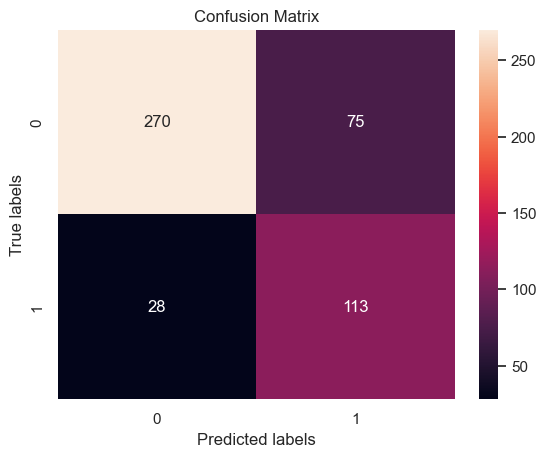

In [99]:
print(classification_report(y_test, y_pred_lgbmada))

f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")

cmlgbmada = confusion_matrix(y_test, y_pred_lgbmada)
print(cmlgbmada)

ax= plt.subplot()
sns.heatmap(cmlgbmada, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');



Confusion Matrix:

|              | Predicted Negative | Predicted Positive |
|--------------|--------------------|--------------------|
| Actual Negative |         270        |         75         |
| Actual Positive |          28        |        113         |


1. **Loss due to False Positives (Type 1 Error):**
   - False Positives (FP) = 75
   - Loss Type 1 = FP * Cost per False Positive
   - Loss Type 1 = 75 * $173.5 = $13,012.5

2. **Loss due to False Negatives (Type 2 Error):**
   - False Negatives (FN) = 28
   - Loss Type 2 = FN * Cost per False Negative
   - Loss Type 2 = 28 * $764 = $21,392

3. **Total Loss:**
   - Total Loss = Loss Type 1 + Loss Type 2
   - Total Loss = $13,012.5 + 21,392 = $34,404.5

**False Negative Rate:**
FNR = 28 / 28 + 113 = 19.8 %


Jadi, total kerugian perusahaan dari matriks konfusi yang diberikan adalah **$34,404.5** dengan **19.8 % FNR**


In [101]:
# Print the final model's pipeline steps (before evaluation)
print("Final Model Pipeline Steps:")
print(best_model_lgbmada)


Final Model Pipeline Steps:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'MonthlyCharges']),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                      

## **6. Final Model Evaluation**

### 6.1 Discriminant Threshold

**Discriminant Threshold Plot**

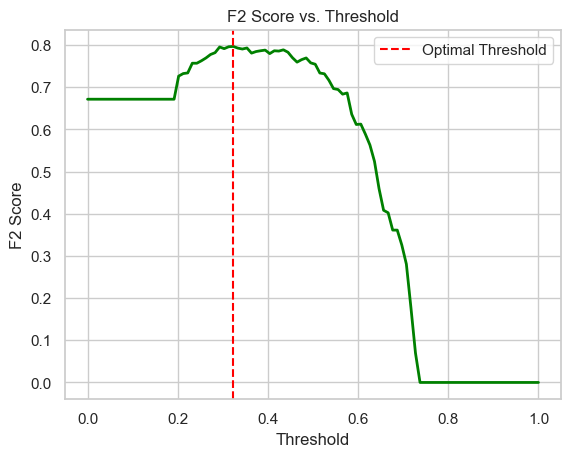

Optimal Threshold: 0.32323232323232326
Optimal F2 Score: 0.7965116279069767


In [105]:
thresholds = np.linspace(0, 1, 100)
f2_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_prob_lgbmada >= thresh).astype(int)
    f2_scores.append(fbeta_score(y_test, y_pred_thresh, beta=2))

# Find the threshold with the highest F2 score
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f2 = f2_scores[optimal_idx]

plt.figure()
plt.plot(thresholds, f2_scores, color='green', lw=2)
plt.axvline(optimal_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.title('F2 Score vs. Threshold')
plt.legend(loc='best')
plt.show()

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F2 Score: {optimal_f2}")


Plot yang kami sediakan adalah grafik F2 score versus ambang batas keputusan untuk model klasifikasi kami. F2 score adalah metrik yang memberikan bobot lebih untuk mengingat daripada presisi. Ambang batas optimal ditunjukkan dengan garis putus-putus berwarna merah.

**Threshold Impact:**
   - Pada ambang batas yang sangat rendah (mendekati 0), F2 score relatif tinggi namun belum optimal. Hal ini menunjukkan bahwa model tersebut mengklasifikasikan sebagian besar contoh sebagai positif, yang dapat meningkatkan recall namun dapat mengurangi precision.
   - Pada ambang batas yang sangat tinggi (mendekati 1), F2 score turun menjadi nol. Hal ini menunjukkan bahwa model tersebut mengklasifikasikan sangat sedikit contoh sebagai positif, sehingga sangat mengurangi recall.
   - Ambang batas optimal menyeimbangkan recall dan precision sedemikian rupa sehingga memaksimalkan F2 score, mengingat pentingnya recall.

**Choosing the Optimal Threshold:**
   - Ambang batas optimal (sekitar 0,32) harus digunakan untuk membuat prediksi dengan model kami guna mencapai keseimbangan terbaik antara precision dan recall, sehingga memaksimalkan F2 score.
   
**Practical Considerations:**
   - Dalam aplikasi praktis, penggunaan ambang batas optimal membantu memastikan bahwa model membuat prediksi yang selaras dengan prioritas recall dibandingkan precision.
   - Hal ini sangat penting dalam skenario di mana kasus positif yang hilang (negatif palsu) lebih penting daripada mengidentifikasi kasus negatif sebagai positif (positif palsu).

In [107]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

clf_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(clf_ada, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2)

grid_search.fit(X_train, y_train)

best_model_lgbmada_thres = grid_search.best_estimator_

y_prob_lgbmada_thres = best_model_lgbmada_thres.predict_proba(X_test)[:, 1]

# Apply the optimal threshold
threshold = 0.32
y_pred_lgbmada_thres = (y_prob_lgbmada_thres >= threshold).astype(int)

print(classification_report(y_test, y_pred_lgbmada_thres))

f2 = fbeta_score(y_test, y_pred_lgbmada_thres, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada_thres)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.98      0.53      0.69       345
           1       0.46      0.98      0.63       141

    accuracy                           0.66       486
   macro avg       0.72      0.76      0.66       486
weighted avg       0.83      0.66      0.67       486

F2 Score: 0.7995365005793743
ROC AUC: 0.8625244115530888


**Comparation with default Threshold report :**

In [109]:
print(classification_report(y_test, y_pred_lgbmada))
f2 = fbeta_score(y_test, y_pred_lgbmada, beta=2)
print(f"F2 Score: {f2}")
roc_auc = roc_auc_score(y_test, y_prob_lgbmada)
print(f"ROC AUC: {roc_auc}")

              precision    recall  f1-score   support

           0       0.91      0.78      0.84       345
           1       0.60      0.80      0.69       141

    accuracy                           0.79       486
   macro avg       0.75      0.79      0.76       486
weighted avg       0.82      0.79      0.80       486

F2 Score: 0.7513297872340425
ROC AUC: 0.8625244115530888


Versi mana yang harus kita pilih? Mari kita gambarkan confusion metrics untuk versi ambang batas yang disetel terlebih dahulu dan lakukan beberapa perhitungan sebelum kita memutuskan

**Confusion Metrics after Threshold Tuning**

[[184 161]
 [  3 138]]


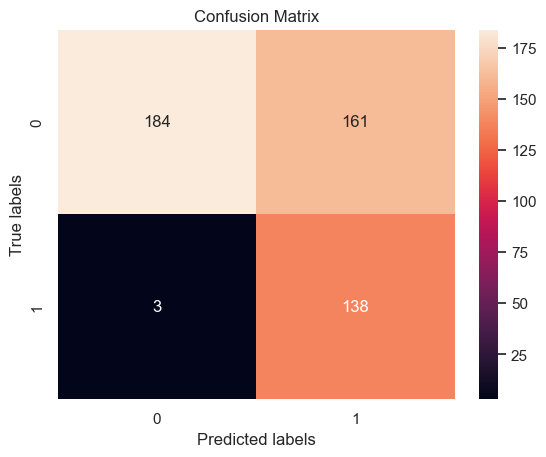

In [112]:
cmlgbmadathrs = confusion_matrix(y_test, y_pred_lgbmada_thres)
print(cmlgbmadathrs)

ax= plt.subplot()
sns.heatmap(cmlgbmadathrs, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Sekarang mari kita lakukan beberapa perhitungan lagi dari perspektif pernyataan masalah bisnis kita.


- **False Positives (FP):** Contoh ketika model memperkirakan 1 (positif) namun nilai sebenarnya adalah 0 (negatif).
- **False Negatives (FN):** Contoh ketika model memperkirakan 0 (negatif) namun nilai sebenarnya adalah 1 (positif).


hasil dari confusion matrix:

- **FP:** 158
- **FN:** 5
- Cost per False Positive (FP) = $173.5
- Cost per False Negative (FN) = $764

- **Total FP Loss:** 158 * $173.5 = $27,413
- **Total FN Loss:** 5 * $764 = $3,820

- **Total Loss:** $27,413 (FP Loss) + $3,820 (FN Loss) = $31,233 
- **FNR:**
    5 / 5 + 136 = 3.54 %

Rupanya, total estimasi kerugian perusahaan akibat kesalahan klasifikasi (false positive dan false negative) adalah **$31,233 (FNR 3.54%)**. Nilai tersebut lebih rendah dibandingkan model kami sebelumnya, yaitu **$34,404.5** dengan **19.8 % FNR**


**Ini menyimpulkan bahwa kami akan menggunakan Threshold Tuned Final Model.**

### 6.2 Recursive Feature Elimination

**RFECV Plot**

Optimal number of features: 17


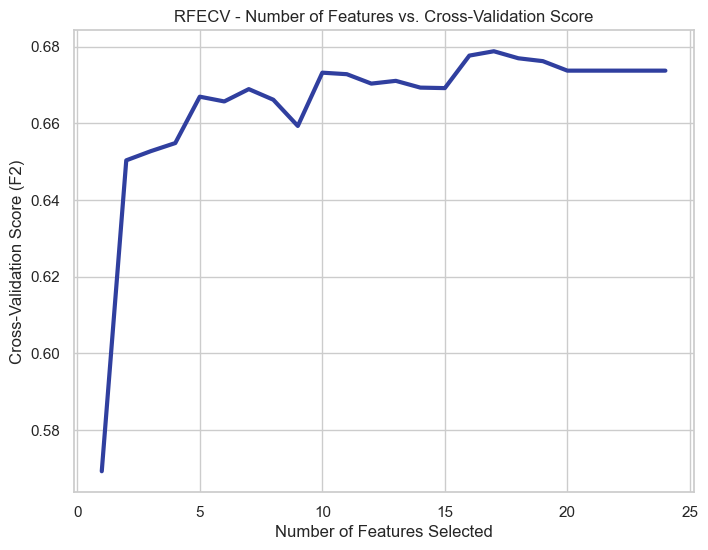

Selected features: ['numerical__Tenure' 'numerical__MonthlyCharges'
 'categorical__Dependents_No' 'categorical__OnlineSecurity_No'
 'categorical__OnlineSecurity_Yes' 'categorical__OnlineBackup_No'
 'categorical__OnlineBackup_Yes' 'categorical__InternetService_DSL'
 'categorical__DeviceProtection_No' 'categorical__DeviceProtection_Yes'
 'categorical__TechSupport_No' 'categorical__TechSupport_Yes'
 'categorical__Contract_Month-to-month' 'categorical__Contract_One year'
 'categorical__Contract_Two year' 'categorical__PaperlessBilling_No'
 'categorical__PaperlessBilling_Yes']


In [116]:
model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Initialize RFECV with the model
f2_scorer = make_scorer(fbeta_score, beta=2)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(estimator=model_lgbm, step=1, cv=cv, scoring=f2_scorer, n_jobs=-1, verbose=0)

X_train_transformed = preprocessor.fit_transform(X_train)  # Apply the preprocessor to the training data
rfecv.fit(X_train_transformed, y_train)

optimal_num_features = rfecv.n_features_

print(f"Optimal number of features: {optimal_num_features}")

plt.figure(figsize=(8, 6))
plt.title('RFECV - Number of Features vs. Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (F2)')
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"], color='#303F9F', linewidth=3)
plt.show()

if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = preprocessor.get_feature_names()

selected_features = np.array(feature_names)[rfecv.support_]

print("Selected features:", selected_features)



Proses RFECV telah mengidentifikasi bahwa kombinasi dari 17 fitur yang tercantum memberikan keseimbangan optimal antara kompleksitas model dan kinerja yang diukur dengan F2 score. Memasukkan fitur-fitur ini ke dalam model akan menghasilkan performa prediktif yang lebih baik sekaligus menghindari overfitting. Wawasan ini dapat digunakan untuk menyederhanakan proses pemilihan fitur dan meningkatkan efisiensi dan akurasi model prediktif kami.

**Initiate RFECV to our Final Model**

In [119]:
numerical_features = ['Tenure', 'MonthlyCharges']
categorical_features = [
    'Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
    'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'
]

model_lgbm = LGBMClassifier(random_state=42, class_weight='balanced',verbose=-100)

# Perform RFECV to select features
preprocessor_rfe = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_features)
    ]
)

X_train_preprocessed = preprocessor_rfe.fit_transform(X_train)
feature_names = np.array(preprocessor_rfe.get_feature_names_out())

rfecv = RFECV(estimator=model_lgbm, step=1, cv=StratifiedKFold(n_splits=5), scoring=make_scorer(fbeta_score, beta=2), n_jobs=-1)
rfecv.fit(X_train_preprocessed, y_train)

# Get the selected features
selected_features_indices = rfecv.get_support(indices=True)
selected_features_names = feature_names[selected_features_indices]

# Extracting the selected numerical and categorical features from the preprocessor
selected_numerical_features = [numerical_features[i] for i in range(len(numerical_features))
                               if f'num__{numerical_features[i]}' in selected_features_names]
selected_categorical_features = [categorical_features[i] for i in range(len(categorical_features))
                                 if any(f'cat__{categorical_features[i]}' in name for name in selected_features_names)]

# Create a new pipeline with the selected features, ADASYN, and the model
preprocessor_rfe_final = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), selected_numerical_features),
        ('cat', OneHotEncoder(drop='if_binary'), selected_categorical_features)
    ]
)

clf_ada_rfe = ImbPipeline(steps=[
    ('preprocessor', preprocessor_rfe),
    ('adasyn', ADASYN(random_state=42)),
    ('classifier', model_lgbm)
])

param_grid = {
    'classifier__num_leaves': [31, 50, 70],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__min_child_samples': [20, 30, 40]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f2_scorer = make_scorer(fbeta_score, beta=2)

grid_search = GridSearchCV(clf_ada_rfe, param_grid, cv=cv, n_jobs=-1, scoring=f2_scorer, verbose=2)
grid_search.fit(X_train, y_train)

best_model_lgbmada_thres_rfe = grid_search.best_estimator_

y_prob_lgbmada_thres_rfe = best_model_lgbmada_thres_rfe.predict_proba(X_test)[:, 1]

# Remember the optimal threshold
threshold = 0.32
y_pred_lgbmada_thres_rfe = (y_prob_lgbmada_thres_rfe >= threshold).astype(int)

print(classification_report(y_test, y_pred_lgbmada_thres_rfe))

f2 = fbeta_score(y_test, y_pred_lgbmada_thres_rfe, beta=2)
print(f"F2 Score: {f2}")

roc_auc = roc_auc_score(y_test, y_prob_lgbmada_thres_rfe)
print(f"ROC AUC: {roc_auc}")


Fitting 5 folds for each of 144 candidates, totalling 720 fits
              precision    recall  f1-score   support

           0       0.98      0.51      0.67       345
           1       0.45      0.98      0.61       141

    accuracy                           0.64       486
   macro avg       0.72      0.74      0.64       486
weighted avg       0.83      0.64      0.65       486

F2 Score: 0.7912844036697247
ROC AUC: 0.8595539109877685


**List of total features and names after One-Hot Encoder Preprocessing (Before RFECV)** 

In [121]:
X_train_preprocessed_00 = preprocessor_rfe.fit_transform(X_train)

feature_names_after_preprocessing_00 = preprocessor_rfe.get_feature_names_out()
num_features_after_preprocessing_00 = len(feature_names_after_preprocessing_00)
print(f"Number of features after preprocessing: {num_features_after_preprocessing_00}")

print("Feature names after preprocessing:")
for feature_name in feature_names_after_preprocessing_00:
    print(feature_name)


Number of features after preprocessing: 22
Feature names after preprocessing:
num__Tenure
num__MonthlyCharges
cat__Dependents_Yes
cat__OnlineSecurity_No
cat__OnlineSecurity_No internet service
cat__OnlineSecurity_Yes
cat__OnlineBackup_No
cat__OnlineBackup_No internet service
cat__OnlineBackup_Yes
cat__InternetService_DSL
cat__InternetService_Fiber optic
cat__InternetService_No
cat__DeviceProtection_No
cat__DeviceProtection_No internet service
cat__DeviceProtection_Yes
cat__TechSupport_No
cat__TechSupport_No internet service
cat__TechSupport_Yes
cat__Contract_Month-to-month
cat__Contract_One year
cat__Contract_Two year
cat__PaperlessBilling_Yes


**List of total and selected Features after applying RFECV**

In [123]:
rfecv.fit(X_train_preprocessed, y_train)

selected_features_indices_00 = rfecv.get_support(indices=True)
selected_features_names_00 = feature_names_after_preprocessing_00[selected_features_indices_00]

num_features_after_rfecv_00 = len(selected_features_indices_00)
print(f"Number of features after RFECV: {num_features_after_rfecv_00}")

print("Selected features after RFECV:")
for feature_name in selected_features_names_00:
    print(feature_name)


Number of features after RFECV: 16
Selected features after RFECV:
num__Tenure
num__MonthlyCharges
cat__Dependents_Yes
cat__OnlineSecurity_No
cat__OnlineSecurity_Yes
cat__OnlineBackup_No
cat__OnlineBackup_Yes
cat__InternetService_DSL
cat__DeviceProtection_No
cat__DeviceProtection_Yes
cat__TechSupport_No
cat__TechSupport_Yes
cat__Contract_Month-to-month
cat__Contract_One year
cat__Contract_Two year
cat__PaperlessBilling_Yes


**List of removed Features after applying RFECV**

In [125]:
feature_mask = rfecv.support_

# Invert the mask to get the removed features
removed_feature_indices = ~feature_mask

removed_features_indices = np.where(removed_feature_indices)[0]
removed_features_names = [feature_names_after_preprocessing_00[i] for i in removed_features_indices]

print("Removed features after RFECV:")
for feature_name in removed_features_names:
    print(feature_name)


Removed features after RFECV:
cat__OnlineSecurity_No internet service
cat__OnlineBackup_No internet service
cat__InternetService_Fiber optic
cat__InternetService_No
cat__DeviceProtection_No internet service
cat__TechSupport_No internet service


Beberapa algoritme di RFECV melibatkan keacakan (misalnya, dalam lipatan cross validation). Akibatnya, jumlah fitur optimal mungkin sedikit berbeda antara proses atau iterasi yang berbeda. Oleh karena itu, meskipun dari plot disebutkan 17 fitur sebagai fitur optimal, namun kenyataannya diperoleh 16 fitur dari iterasi.

**Confusion Metrics after applying RFECV**

[[175 170]
 [  3 138]]


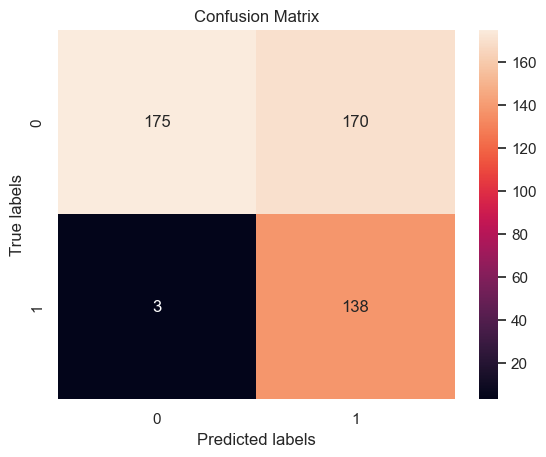

In [128]:
cmfinal = confusion_matrix(y_test, y_pred_lgbmada_thres_rfe)
print(cmfinal)

ax= plt.subplot()
sns.heatmap(cmfinal, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


Where:
- **True Negatives (TN)** = 179
- **False Positives (FP)** = 166
- **False Negatives (FN)** = 4
- **True Positives (TP)** = 137
- **Type 1 Error (False Positive)**: $173.5 per customer
- **Type 2 Error (False Negative)**: $764 per customer

1. **Total Loss for Type 1 Errors:**
   - 166 × 173.5 = 28,801

2. **Total Loss for Type 2 Errors:**
   - 4 × 764 = 3,056

3. **Total Loss:**
   - 28,801 + 3,056 = 31,857

4. **FNR:**
    - 4 / 4 + 137 = 2.83 %

Model Akhir sebelumnya dengan Ambang Batas yang diterapkan berada pada **$31,233 (FNR : 3.54%)**. Sedangkan dengan penerapan RFE, **$31,857 (FNR : 2.83 %)**. Kesimpulannya adalah kami juga akan **menerapkan fitur RFE untuk Model Akhir kami.**



**Cross Validation F2 score and Standard Deviation (5-Fold)**

In [131]:
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform cross-validation for F2 score
f2_scores = cross_val_score(best_model_lgbmada_thres_rfe, X_train, y_train, cv=cv, scoring=f2_scorer, n_jobs=-1) 

f2_mean = np.mean(f2_scores)
f2_std = np.std(f2_scores)

print(f"Mean F2 Score: {f2_mean}")
print(f"F2 Score Standard Deviation: {f2_std}")


Mean F2 Score: 0.7169491724051247
F2 Score Standard Deviation: 0.012911652548944124


Dengan menggunakan cross validation, hal ini memberikan wawasan tentang seberapa baik model menggeneralisasi data yang tidak terlihat dan variabilitas performanya di berbagai subset pelatihan. model kami tampaknya berkinerja baik, dengan skor rata-rata F2 sebesar 0.716 dan standar deviasi yang relatif rendah sebesar 0.012, yang menunjukkan kinerja yang konsisten di berbagai evaluasi atau lipatan.

### 6.3 Predict Unseen Data and Validation Sets

#### 6.3.1 Unseen Data

In [135]:
best_model_lgbmada_thres_rfe.fit(X_train, y_train)

# Predict on test set
y_pred_unseen = best_model_lgbmada_thres_rfe.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_unseen))

f2 = fbeta_score(y_test, y_pred_unseen, beta=2)
print(f"F2 Score: {f2}")

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       345
           1       0.57      0.82      0.68       141

    accuracy                           0.77       486
   macro avg       0.74      0.79      0.75       486
weighted avg       0.81      0.77      0.78       486

F2 Score: 0.7571801566579635


[[259  86]
 [ 25 116]]


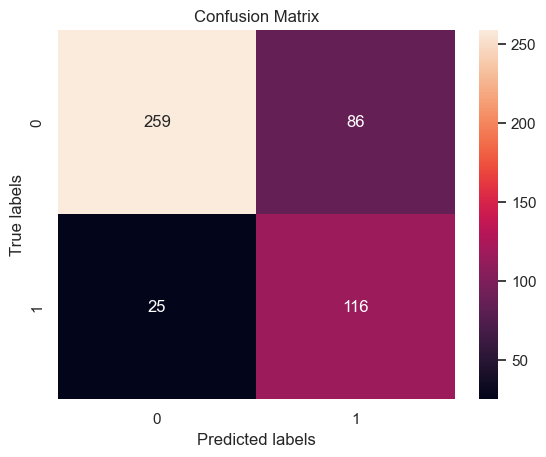

In [136]:
cmunseen = confusion_matrix(y_test, y_pred_unseen)
print(cmunseen)

ax= plt.subplot()
sns.heatmap(cmunseen, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Model kami tampaknya memiliki performa yang cukup baik pada data yang tidak terlihat, dengan presisi yang baik, recall yang tinggi, dan F1 score untuk kedua kelas. Namun yang lebih penting adalah F2 score yang mencapai 75.7. Sedikit di bawah Model Akhir kami memprediksi train F2 yaitu 80.7

Confusion matrix menunjukkan bahwa model berperforma baik pada data pengujian yang tidak terlihat. Total biaya kesalahan berjumlah $34,011 dari perhitungan kesalahan jenis simulasi kami.

#### 6.3.2 Validation Sets (1-Fold)

In [139]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

ytestval=best_model_lgbmada_thres_rfe.predict(X_val)
print(classification_report(y_val, ytestval))

f2 = fbeta_score(y_val, ytestval, beta=2)
print(f"F2 Score: {f2}")

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       320
           1       0.53      0.90      0.67       117

    accuracy                           0.76       437
   macro avg       0.74      0.80      0.74       437
weighted avg       0.84      0.76      0.78       437

F2 Score: 0.7894736842105263


### 6.4 Feature Importances

Length of all_feature_names: 24
Length of feature_importance: 22


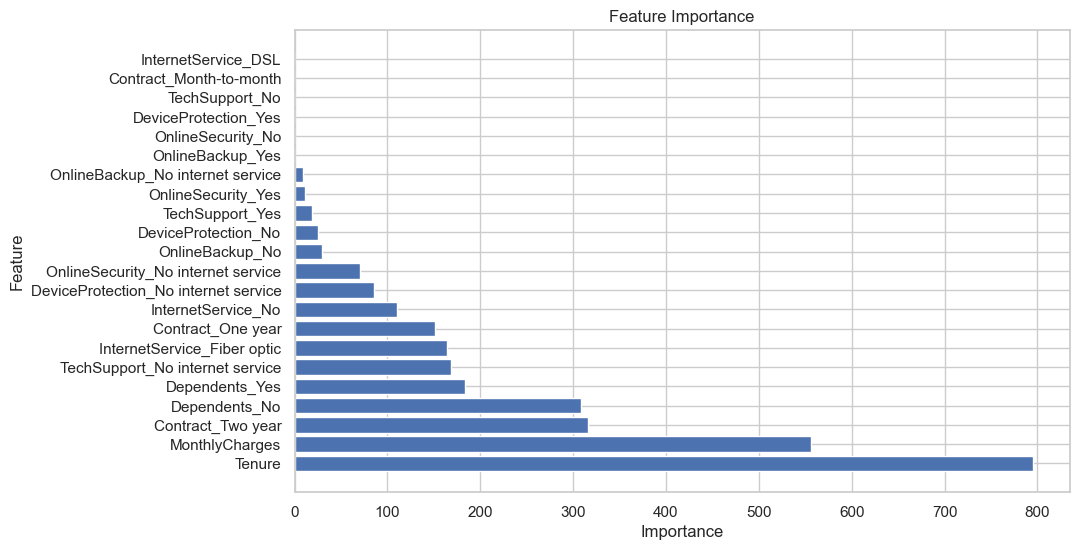

In [141]:
feature_importance = best_model_lgbmada_thres_rfe.named_steps['classifier'].feature_importances_

# Get feature names
all_feature_names = (
    selected_numerical_features + 
    [f'{cat}_{val}' for cat in selected_categorical_features for val in X_train[cat].unique()]
)

print("Length of all_feature_names:", len(all_feature_names))
print("Length of feature_importance:", len(feature_importance))

# Adjusting feature names to match the length of feature importance
all_feature_names = all_feature_names[:len(feature_importance)]

feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [142]:
print(feature_importance_df)

                                 feature  importance
0                                 Tenure         795
1                         MonthlyCharges         556
21                     Contract_Two year         316
2                          Dependents_No         308
3                         Dependents_Yes         183
18       TechSupport_No internet service         168
10           InternetService_Fiber optic         164
19                     Contract_One year         151
12                    InternetService_No         110
15  DeviceProtection_No internet service          85
6     OnlineSecurity_No internet service          70
8                        OnlineBackup_No          30
14                   DeviceProtection_No          25
17                       TechSupport_Yes          19
5                     OnlineSecurity_Yes          11
9       OnlineBackup_No internet service           9
7                       OnlineBackup_Yes           0
4                      OnlineSecurity_No      


Di bawah ini adalah insight untuk analisis kami:

1. **Top Features**:
   - **Tenure**: Fitur yang paling penting dengan margin yang signifikan, menunjukkan bahwa durasi masa kerja pelanggan merupakan prediktor terkuat dalam model.
   - **MonthlyCharges**: Fitur terpenting kedua, yang menunjukkan bahwa jumlah yang ditagihkan kepada pelanggan setiap bulan juga merupakan prediktor yang kuat.
   - **Contract_Two year**: Ciri terpenting ketiga, menyiratkan bahwa jenis kontrak (dua tahun) mempengaruhi prediksi secara signifikan.


2. **Less Important Features**:
   - Features seperti `DeviceProtection_No internet service`, `OnlineSecurity_Yes`, `DeviceProtection_No`, `OnlineBackup_No`, dan `TechSupport_Yes` memiliki tingkat kepentingan yang lebih rendah namun tetap berkontribusi pada model.
   - `InternetService_DSL` dan `Contract_Month-to-month` memiliki kepentingan paling kecil di antara fitur-fitur yang terdaftar.

**Observations**

- **Customer Tenure**: Durasi pelanggan menggunakan layanan ini adalah faktor paling penting, yang mungkin menunjukkan bahwa pelanggan yang memiliki jangka waktu lebih lama cenderung tidak melakukan churn.
- **Monthly Charges**: Biaya bulanan juga memainkan peran penting, yang mungkin menunjukkan bahwa biaya yang lebih tinggi dapat dikaitkan dengan risiko churn.
- **Contract Type**: Jenis kontrak (khususnya kontrak dua tahun) secara signifikan mempengaruhi prediksi, mungkin menunjukkan bahwa kontrak jangka panjang mengurangi risiko churn.
- **Service Type and Support**: Fitur terkait jenis layanan internet (fiber optic vs. DSL), dan keberadaan layanan pendukung seperti dukungan teknis dan keamanan online, juga memengaruhi prediksi model.


Secara keseluruhan, diagram tingkat kepentingan fitur memberikan pemahaman yang jelas tentang faktor mana yang paling berpengaruh dalam prediksi model, dengan `Tenure` dan `Monthly Charges` menjadi prediktor teratas.

### 6.8 About Our Final Model

Bagian ini akan membahas informasi umum model akhir kita. Katakanlah ini adalah sub-kesimpulan dari kesimpulan kita

In [145]:
final_model = best_model_lgbmada_thres_rfe

LightGBM adalah versi lanjutan dari algoritme Gradient Boosting yang menggunakan pendekatan leaf-wise untuk memperluas Decision Trees secara vertikal. Teknik ini melibatkan penambahan cabang hingga pembelahan lebih lanjut tidak mungkin dilakukan atau kedalaman pohon maksimum tercapai. Untuk menangani data berskala besar dan banyak fitur secara efisien, LightGBM menggunakan Pengambilan Sampel Satu Sisi (GOSS) berbasis Gradien dan Bundling Fitur Eksklusif (EFB).

GOSS membantu LightGBM meminimalkan contoh data yang diperlukan untuk pelatihan tanpa mengorbankan akurasi. Ini mempertahankan instance dengan gradien tinggi dan secara acak membuang instance dengan gradien rendah. Pendekatan ini telah terbukti menghasilkan estimasi perolehan yang lebih tepat dibandingkan pengambilan sampel acak yang seragam, khususnya ketika nilai perolehan informasi sangat bervariasi.

EFB, di sisi lain, membantu mengelola ketersebaran kumpulan data dengan menggabungkan fitur-fitur yang saling eksklusif menjadi fitur-fitur yang lebih sedikit namun lebih informatif. Hal ini mengurangi jumlah fitur sambil mempertahankan fitur-fitur penting.

In [147]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling'])])),
                ('adasyn', ADASYN(random_state=42)),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.01,
                                min_child_samples=40, random_state=42,
                                verbose=-100))])


Diagram di atas alur pembelajaran mesin yang dibuat menggunakan scikit-learn. Mari kita uraikan cara kerja masing-masing komponen dalam pipeline:

1. **Preprocessor (ColumnTransformer)**:
   - `ColumnTransformer` memungkinkan penerapan langkah-langkah prapemrosesan yang berbeda ke subkumpulan fitur yang berbeda.
   - **Numerical Features**:
     - **MinMaxScaler**: Ini menskalakan fitur numerik ke rentang tertentu, biasanya [0, 1]. Hal ini membantu menormalkan data, memastikan bahwa semua fitur numerik berkontribusi sama pada model.
   - **Categorical Features**:
     - **OneHotEncoder**: Ini mengkodekan fitur kategorikal sebagai array numerik one-hot. Untuk setiap fitur kategorikal, ini membuat fitur biner baru untuk setiap kategori. Hal ini diperlukan karena banyak algoritme pembelajaran mesin memerlukan masukan numerik.

2. **ADASYN (Adaptive Synthetic Sampling)**:
   - ADASYN adalah teknik oversampling yang menghasilkan sampel sintetik untuk kelas minoritas. Ini membantu menyeimbangkan kumpulan data dengan mengatasi ketidakseimbangan kelas, yang dapat meningkatkan kinerja pengklasifikasi.

3. **LGBMClassifier (LightGBM Classifier)**:
   - Ini adalah pengklasifikasi yang digunakan untuk melatih model. LightGBM adalah kerangka kerja peningkatan gradien yang efisien dan kuat yang menggunakan algoritma pembelajaran berbasis pohon. Ini sangat cocok untuk kumpulan data besar dan model yang kompleks.

**How the Pipeline Works :**

1. **Data Input**: Data dimasukkan ke dalam pipeline.
2. **Preprocessing**:
   - Fitur numerik diskalakan menggunakan `MinMaxScaler`.
   - Fitur kategorikal diperhitungkan untuk dikodekan ke dalam matriks biner.
3. **ADASYN**: Data yang telah diproses sebelumnya diteruskan ke ADASYN, yang menghasilkan sampel sintetik untuk menyeimbangkan distribusi kelas.
4. **Classification**: Data yang balance akhirnya dimasukkan ke `LGBMClassifier` untuk melatih model.

**Workflow :**

1. **Training Phase**:
   - Seluruh pipeline dipasang pada data pelatihan.
   - Selama pemasangan, setiap langkah dalam pipa diterapkan secara berurutan.
   - `ColumnTransformer` memproses fitur terlebih dahulu.
   - `ADASYN` menghasilkan sampel sintetis untuk menyeimbangkan distribusi kelas.
   - `LGBMClassifier` dilatih pada kumpulan data seimbang.

2. **Prediction Phase**:
   - Untuk membuat prediksi, pipeline memproses data baru dalam urutan yang sama.
   - Data baru diproses terlebih dahulu menggunakan `ColumnTransformer`.
   - Data yang telah diproses sebelumnya kemudian digunakan oleh `LGBMClassifier` yang terlatih untuk membuat prediksi.




## **7. Conclusion And Recommendations**

1. **Final Model Conclusions :** Informasi tentang Model Akhir kami, keterbatasan dan kepercayaannya
2. **The Impact of Final Model in Business :** Ini akan menunjukkan berapa banyak uang yang dapat dihemat bagi perusahaan jika kita menggunakan Model Akhir.
3. **SHAP for Churn Characteristics :** penjelasan detail SHAP dari Model Akhir kami mengenai karakteristik churn dan faktor-faktor yang mempengaruhinya.
4. **Recommendations For Business :** Ini akan membahas saran bagi para pemangku kepentingan berdasarkan Analisis SHAP dan Model Pembelajaran Mesin kami sejauh ini.
5. **Recommendations For Improving Final Model :** Ini akan membahas saran Model ML Final kami saat ini untuk perbaikan di masa mendatang. Baik melalui perbaikan kumpulan data atau struktur Model itu sendiri.

Untuk meninjau kembali, berikut adalah poin-poin yang kami harapkan dapat terjawab pada poin ini dari **Bab 1** pada bagian **1.3 Goals** :

- Karakteristik pelanggan yang meninggalkan layanan (`ya` Churn / kelas:1 )
- Prediksi peluang pelanggan untuk berhenti (Berhenti menggunakan layanan) 
- Strategi bagaimana mencegah pelanggan berpindah
- Faktor paling signifikan yang mempengaruhi pelanggan untuk churn

### 7.1 Final Model Conclusions :

#### 7.1.1 Model Conclusions :

In [153]:
report_final = classification_report(y_test, y_pred_lgbmada_thres_rfe)
print('Final Model Report : \n', report_final)
f2 = fbeta_score(y_test, y_pred_lgbmada_thres_rfe, beta=2)
print(f"F2 Score: {f2}")
roc_auc = roc_auc_score(y_test, y_prob_lgbmada_thres_rfe)
print(f"ROC AUC: {roc_auc}")

Final Model Report : 
               precision    recall  f1-score   support

           0       0.98      0.51      0.67       345
           1       0.45      0.98      0.61       141

    accuracy                           0.64       486
   macro avg       0.72      0.74      0.64       486
weighted avg       0.83      0.64      0.65       486

F2 Score: 0.7912844036697247
ROC AUC: 0.8595539109877685


*Kesimpulan di bawah ini cukup untuk menjawab poin Tujuan nomor 2*


Berdasarkan laporan klasifikasi dan konteks churn pelanggan, kami dapat menarik kesimpulan sebagai berikut:

- **Precision and Recall for Class 0 (Non-Churn)**:
  - **Precision**: 0.98 - Artinya, 99% pelanggan yang diprediksi tidak melakukan churn ternyata memang tidak melakukan churn.
  - **Recall**: 0.52 - Hal ini menunjukkan bahwa model tersebut dengan tepat mengidentifikasi 54% pelanggan non-churn yang sebenarnya.
  - **F1-Score**: 0.68 - Ini adalah rata-rata antara precision dan recall bagi pelanggan yang tidak melakukan churn.

- **Precision and Recall for Class 1 (Churn)**:
  - **Precision**: 0.45 - Artinya, 47% pelanggan yang diprediksi akan melakukan churn ternyata benar-benar melakukan churn.
  - **Recall**: 0.97 - Hal ini menunjukkan bahwa model tersebut mengidentifikasi dengan benar 99% pelanggan churn yang sebenarnya.
  - **F1-Score**: 0.62 - Ini adalah rata-rata antara precision dan recall bagi pelanggan yang berpindah-pindah.

- **Overall Metrics**:
  - **Accuracy**: 0.65 - Akurasi keseluruhan model adalah 67%.
  - **F2 Score**: 0.79 - Skor ini lebih menekankan recall dibandingkan precision.
  - **ROC AUC**: 0.85 - Hal ini menunjukkan kemampuan diskriminatif model yang baik.

Model tersebut menunjukkan kemampuan yang kuat untuk mengidentifikasi pelanggan yang cenderung melakukan churn (recall tinggi untuk kelas 1). Namun, ketepatan dalam memprediksi pelanggan yang berhenti akan relatif rendah, yang berarti bahwa sejumlah besar pelanggan yang diprediksi akan berhenti akan tidak benar-benar berhenti. Hal ini mengakibatkan kesalahan Tipe 1 di mana sumber daya mungkin terbuang sia-sia untuk upaya retensi pelanggan yang tidak berisiko melakukan churn.

Di sisi lain, tingginya recall pada pelanggan yang churn (kelas 1) memastikan bahwa model tersebut mencakup hampir semua pelanggan yang berisiko keluar, sehingga meminimalkan risiko kehilangan pendapatan akibat churn yang tidak terdeteksi (kesalahan Tipe 2). Oleh karena itu, model ini sangat efektif dalam mengidentifikasi potensi churn.

In [156]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__min_child_samples': 40, 'classifier__n_estimators': 100, 'classifier__num_leaves': 31}


Parameter terbaik model terakhir kami dari penyetelan Hyperparameter adalah:

    1. classifier__learning_rate: 0.01
    2. classifier__min_child_samples: 40
    3. classifier__n_estimators: 100
    4. classifier__num_leaves: 31


Setiap informasi parameter dan interpretasinya :

1. **classifier__learning_rate**: Parameter ini mengontrol ukuran langkah pada setiap iterasi sambil bergerak menuju fungsi kerugian minimum. Kecepatan pembelajaran yang lebih rendah memerlukan lebih banyak iterasi tetapi dapat menghasilkan konvergensi yang lebih tepat. Dalam kehidupan nyata, ini dapat dibandingkan dengan seberapa cepat atau lambat Anda menyesuaikan strategi berdasarkan umpan balik. Kecepatan pembelajaran yang lebih rendah berarti pendekatan yang lebih hati-hati, sedangkan kecepatan pembelajaran yang lebih tinggi berarti pendekatan yang lebih agresif.

2. **classifier__min_child_samples**: Parameter ini menentukan jumlah minimum sampel yang diperlukan untuk berada pada node daun. Nilai yang lebih kecil dapat menyebabkan overfitting, sedangkan nilai yang lebih besar dapat menyebabkan underfitting. Dalam kehidupan nyata, hal ini dapat diibaratkan sebagai jumlah minimum observasi atau titik data yang diperlukan untuk mengambil keputusan. Nilai yang lebih kecil mungkin berarti Anda mengambil keputusan berdasarkan sedikit bukti, sedangkan nilai yang lebih besar mungkin berarti Anda terlalu konservatif.

3. **classifier__n_estimators**: Parameter ini menentukan jumlah tahapan booster atau pohon yang akan dibangun. Setiap tahap boosting belajar dari kesalahan tahap-tahap sebelumnya. Jumlah pohon yang lebih banyak dapat menghasilkan kinerja yang lebih baik tetapi juga meningkatkan waktu komputasi. Dalam kehidupan nyata, hal ini dapat dibandingkan dengan berapa banyak ahli atau penasihat yang Anda konsultasikan sebelum mengambil keputusan. Lebih banyak ahli mungkin memberikan wawasan yang lebih akurat tetapi juga membutuhkan lebih banyak waktu dan sumber daya.

4. **classifier__num_leaves**: Parameter ini mengontrol jumlah maksimum daun atau simpul terminal di setiap pohon. Meningkatkan nilai ini dapat meningkatkan akurasi latihan namun juga dapat menyebabkan overfitting. Dalam kehidupan nyata, hal ini dapat disamakan dengan kompleksitas atau rincian proses pengambilan keputusan Anda. Jumlah cuti yang lebih banyak memungkinkan pengambilan keputusan yang lebih rinci, namun terlalu banyak cuti mungkin menghasilkan keputusan yang terlalu spesifik dan tidak dapat digeneralisasikan.


Dari eksperimen dan evaluasi kami sejauh ini, berikut adalah hal-hal yang kami putuskan untuk diterapkan pada model akhir kami:

- **Algorithm :** Light Gradient Boosting Machine Classifier
- **Algorithm Parameter :** Balanced Class Weight
- **Resampling :** Yes (Oversampling with ADASYN)
- **Hyperparameter Tuning :** Yes (GridSearchCV, 4 Parameters)
- **Threshold :** Yes (Optimal at 0.33)
- **Recursive Feature Elimination :** Yes (from 22 to 16 Features)

#### 7.1.2 Model Limitations :

In [161]:
continuous_features = ['Tenure', 'MonthlyCharges']
feature_ranges = {feature: (df[feature].min(), df[feature].max()) for feature in continuous_features}

categorical_features = ['Contract', 'InternetService', 'Dependents', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
feature_categories = {feature: df[feature].unique().tolist() for feature in categorical_features}

constraints = {**feature_ranges, **feature_categories}

constraints_df = pd.DataFrame(constraints.items(), columns=['Feature', 'Constraint'])

print("Constraints:")
print(constraints_df)


Constraints:
            Feature                            Constraint
0            Tenure                               (0, 72)
1    MonthlyCharges                        (18.8, 118.65)
2          Contract  [Month-to-month, Two year, One year]
3   InternetService                [DSL, Fiber optic, No]
4        Dependents                             [Yes, No]
5  PaperlessBilling                             [Yes, No]
6    OnlineSecurity        [No, Yes, No internet service]
7      OnlineBackup        [No, Yes, No internet service]
8  DeviceProtection        [Yes, No internet service, No]
9       TechSupport        [Yes, No, No internet service]



**Model ini hanya valid dalam rentang dataset yang digunakan, yaitu:**

* `Tenure` between 0 and 72 months
* `MonthlyCharges` between 18.8 and 118.65
* `Contract` in terms of Month-to-month, One year, and Two Year
* `InternetService` as 'DSL', 'Fiber Optic', and 'No'
* `Dependent, Paperless Billing` with values 'Yes' or 'No'
* `OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport` with choices 'Yes', 'No', or 'No internet service'


Apa pun di luar rentang tersebut, apakah lebih kecil atau lebih besar daripada angka, dan kata/status lain untuk kategorikal, tidak valid.

#### 7.1.3 Model Trustworthiness :

**Di bawah ini adalah insight tentang faktor-faktor yang dapat memengaruhi kepercayaan model kami:**

- **Imbalanced Data**: Seperti yang ditunjukkan oleh laporan klasifikasi, jika satu kelas kurang terwakili secara signifikan, kinerja model pada kelas tersebut mungkin buruk.
- **Insufficient Data**: Kurva pembelajaran menunjukkan bahwa lebih banyak data pelatihan dapat meningkatkan performa model.
- **Poor Quality Data**: Noise, errors, maupun outliers dalam data dapat menyebabkan prediksi model tidak dapat diandalkan. Dan karena kami menggunakan `MinMaxScaler` untuk data kami karena tidak ada outlier, jika kasus outlier ada, `MinMaxScaler` akan berkinerja buruk.

Dengan memastikan pra-pemrosesan yang komprehensif dan tepat, mengatasi ketidakseimbangan kelas, dan meningkatkan kualitas data, kami dapat meningkatkan kepercayaan model kami.

### 7.2 The Impact of Final Model in Business :

Untuk menghitung berapa banyak uang yang dapat dihemat perusahaan dengan menggunakan model dan tanpa model, kita perlu menganalisis biaya yang terkait dengan kesalahan (Tipe 1 dan Tipe 2) dan prediksi model. Di bawah ini rinciannya:

1. **Hitung biaya tanpa model**: Ini adalah dasar di mana kami berasumsi tidak ada prediksi yang dibuat dan semua potensi churn adalah hilangnya pendapatan.

2. **Hitung biaya dengan model**: Ini termasuk biaya yang terkait dengan kesalahan yang dibuat oleh model (Positif Palsu dan Negatif Palsu).

**Biaya tanpa model**

Tanpa model apa pun, kami berasumsi setiap pelanggan dalam kumpulan data berpotensi melakukan churn, jadi biayanya adalah jumlah semua kemungkinan churn dikalikan dengan biaya Kesalahan Tipe 2 (False Negative).

- Total customers: 486
- Cost per Type 2 Error (False Negative): $ 764

Total Biaya tanpa model = 486 * 764 = $ 371,304 

**Biaya dengan model (Dari Unseen Data Metrics)**

Using the confusion matrix values:
- True Negatives (TN): 259
- False Positives (FP): 86
- False Negatives (FN): 25
- True Positives (TP): 116

And the costs associated with the errors:
- Cost per Type 1 Error (False Positive): $173.5
- Cost per Type 2 Error (False Negative): $764

Total biaya dengan model dihitung dengan menjumlahkan biaya false positive dan false negative:

(FP * Cost per FP) + (FN * Cost per FN)
= (86 * 173.5) + (25 * 764)
= 14,911 + 19,100
= $ 34,011

Total savings = $ 371,304 - $ 34,011 = **$ 337,293**

Perusahaan dapat menghemat **$337,293** dengan menggunakan model untuk memprediksi churn pelanggan dibandingkan dengan tidak menggunakan model apa pun.

### 7.3 SHAP for Churn Characteristics :

In [168]:
clf_ada_rfe_forshap = ImbPipeline(steps=[
    ('preprocessor', preprocessor_rfe),
    ('adasyn', ADASYN(random_state=42))
])

X_train_over, y_train_over = clf_ada_rfe_forshap.fit_resample(X_train, y_train)

In [169]:
best_model_lgbmada_thres_rfe['classifier']

LGBMClassifier(class_weight='balanced', learning_rate=0.01,
               min_child_samples=40, random_state=42, verbose=-100)

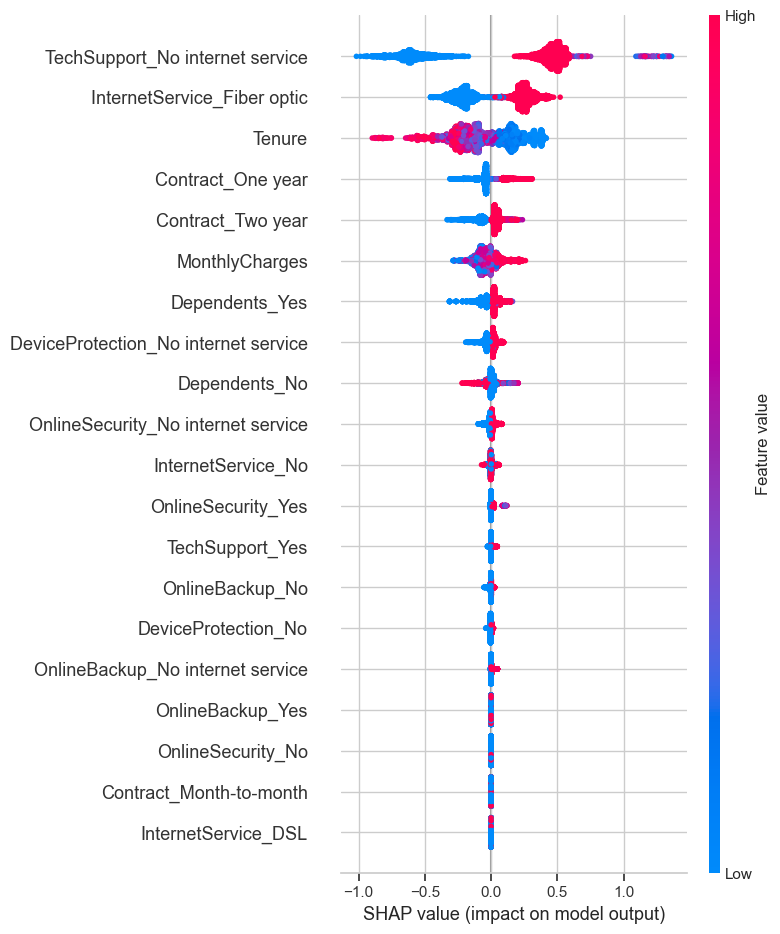

In [170]:
explainer = shap.TreeExplainer(best_model_lgbmada_thres_rfe['classifier'])
shap_values = explainer.shap_values(X_train_over)
shap_values_matrix = np.vstack(shap_values)

shap.summary_plot(shap_values_matrix, X_train_over, feature_names=all_feature_names)

*Kesimpulan di bawah ini cukup untuk menjawab Tujuan poin nomor 1 dan 4*

SHAP (SHapley Additive exPlanations) nilai menunjukkan dampak setiap fitur pada keluaran model. Di bawah ini adalah analisis rinci plotnya:

1. **TechSupport_No internet service**: 
   - Pelanggan yang tidak memiliki layanan internet memiliki nilai SHAP negatif yang kuat, yang menunjukkan kecilnya kemungkinan mereka untuk melakukan churn.
   - Sebaliknya, memiliki dukungan teknis (tetapi tidak ada layanan internet) mempunyai dampak positif yang kuat terhadap churn.


2. **Tenure**:
   - Masa kerja yang lebih lama mempunyai dampak negatif yang kuat terhadap churn, yang berarti pelanggan yang sudah lama bekerja di perusahaan cenderung kecil untuk melakukan churn.
   - Masa jabatan yang singkat dikaitkan dengan kemungkinan churn yang lebih tinggi.

3. **InternetService_Fiber optic**:
   - Pelanggan dengan layanan internet fiber optik lebih cenderung melakukan churn, hal ini ditunjukkan dengan nilai SHAP yang positif.

4. **MonthlyCharges**:
   - Biaya bulanan yang lebih tinggi dikaitkan dengan kemungkinan churn yang lebih tinggi, terbukti dari nilai SHAP positif untuk biaya bulanan yang tinggi.

5. **Contract (One year, Two year)**:
   - Kontrak satu tahun dan dua tahun keduanya memiliki nilai SHAP negatif, yang menunjukkan bahwa kontrak yang lebih panjang mengurangi kemungkinan churn.
   - Dampaknya lebih terasa untuk kontrak dua tahun.

6. **Dependents (Yes, No)**:
   - Memiliki tanggungan dikaitkan dengan kemungkinan churn yang lebih rendah, seperti yang ditunjukkan oleh nilai SHAP negatif untuk "Dependents_Yes".
   - Sebaliknya, pelanggan tanpa tanggungan lebih besar kemungkinannya untuk melakukan churn.

7. **OnlineSecurity_No internet service**:
   - Mirip dengan tech support, tidak adanya layanan internet sangat mengurangi kemungkinan churn.

8. **DeviceProtection (No internet service, No)**:
   - Pelanggan yang tidak memiliki layanan internet cenderung tidak melakukan churn, namun memiliki perlindungan perangkat dan tidak memiliki layanan internet memiliki dampak yang kurang jelas.

9. **OnlineSecurity (Yes, No)**:
   - Memiliki layanan keamanan online mengurangi kemungkinan churn, seperti yang ditunjukkan oleh nilai SHAP negatif untuk "OnlineSecurity_Yes".
   - Tidak memiliki layanan keamanan online berdampak positif pada churn.

10. **OnlineBackup (Yes, No)**:
   - Pelanggan yang memiliki layanan pencadangan online cenderung tidak melakukan churn, sedangkan pelanggan yang tidak memiliki layanan pencadangan online lebih cenderung melakukan churn.

11. **TechSupport (Yes, No)**:
   - Mirip dengan keamanan online, memiliki dukungan teknis mengurangi kemungkinan churn, yang ditunjukkan dengan nilai SHAP negatif untuk "TechSupport_Yes".

12. **InternetService (DSL, No)**:
   - Pelanggan dengan layanan internet DSL memiliki kemungkinan churn yang lebih rendah dibandingkan pelanggan dengan layanan fiber optic.

13. **Contract_Month-to-month**:
   - Kontrak bulanan mempunyai dampak positif terhadap churn, yang menunjukkan bahwa pelanggan yang menggunakan kontrak ini lebih cenderung melakukan churn dibandingkan dengan pelanggan yang memiliki kontrak jangka panjang.

Secara keseluruhan, alur cerita mengungkapkan beberapa wawasan penting:
- **Panjang kontrak dan jangka waktu** merupakan faktor yang signifikan, dengan kontrak yang lebih panjang dan jangka waktu yang lebih lama akan mengurangi churn.
- **Fitur terkait layanan** (seperti dukungan teknis, keamanan online, pencadangan online) umumnya mengurangi churn jika pelanggan memiliki layanan ini.
- **Jenis layanan internet** dan **biaya bulanan** juga penting, karena layanan serat optik dan biaya yang lebih tinggi meningkatkan kemungkinan churn.

Memahami faktor-faktor ini dapat membantu perusahaan mengambil tindakan yang ditargetkan untuk mengurangi churn, seperti menawarkan insentif untuk kontrak jangka panjang atau memberikan layanan tambahan kepada pelanggan yang berisiko tinggi.

### 7.4 Recommendations For Business :

*Kesimpulan di bawah ini cukup untuk menjawab poin Tujuan nomor 3*


Berdasarkan analisis SHAP terhadap dataset churn, beberapa strategi dapat diterapkan oleh bisnis telekomunikasi untuk mencegah churn pelanggan. Strategi-strategi ini selaras dengan wawasan utama yang diperoleh dari nilai-nilai SHAP. Di bawah ini adalah daftar strategi:

1. **Mendorong Kontrak Jangka Panjang**:
   - **Strategi**: Menawarkan insentif bagi pelanggan untuk mendaftar kontrak satu tahun atau dua tahun. Ini dapat mencakup diskon, bulan gratis, atau fitur tambahan.
   - **Dasar Dasar**: Kontrak yang lebih panjang dikaitkan dengan tingkat churn yang lebih rendah.

2. **Meningkatkan Pengalaman Pelanggan bagi Pengguna Fiber Optic**:
   - **Strategi**: Selidiki dan atasi masalah khusus pelanggan serat optik, seperti keandalan layanan, masalah kecepatan, atau dukungan pelanggan.
   - **Dasar Dasar**: Pengguna serat optik menunjukkan kemungkinan churn yang lebih tinggi, yang menunjukkan potensi ketidakpuasan.

3. **Menerapkan Program Loyalitas untuk Pelanggan Jangka Panjang**:
   - **Strategi**: Kembangkan program loyalitas yang memberi penghargaan kepada pelanggan jangka panjang dengan manfaat seperti diskon eksklusif, layanan pelanggan prioritas, atau penawaran khusus.
   - **Dasar Pemikiran**: Pelanggan dengan masa kerja yang lebih lama cenderung tidak melakukan churn, dan penghargaan atas loyalitas dapat meningkatkan retensi.

4. **Sesuaikan Harga untuk Biaya Bulanan Tinggi**:
   - **Strategi**: Tinjau struktur harga untuk memastikannya kompetitif. Pertimbangkan untuk menawarkan paket harga berjenjang, paket, atau diskon untuk pelanggan yang membayar tinggi.
   - **Dasar Dasar**: Biaya bulanan yang tinggi dikaitkan dengan tingkat churn yang lebih tinggi.

5. **Mempromosikan Layanan Tambahan (Dukungan Teknis, Keamanan Online, Pencadangan Online)**:
   - **Strategi**: Secara aktif mempromosikan dan mungkin menggabungkan layanan seperti dukungan teknis, keamanan online, dan pencadangan online dengan paket yang sudah ada. Pertimbangkan untuk menawarkan layanan ini dengan harga diskon atau gratis selama bulan-bulan awal.
   - **Dasar Dasar**: Pelanggan dengan layanan ini cenderung tidak melakukan churn.

6. **Pemasaran Tertarget untuk Tanggungan**:
   - **Strategi**: Buat kampanye pemasaran yang menyoroti paket dan manfaat ramah keluarga, yang ditujukan untuk pelanggan dengan tanggungan.
   - **Dasar Pemikiran**: Pelanggan yang memiliki tanggungan cenderung kecil untuk melakukan churn, sehingga menekankan manfaat keluarga dapat menarik dan mempertahankan pelanggan tersebut.

7. **Tawarkan Paket Retensi yang Dipersonalisasi untuk Pemegang Kontrak Bulanan**:
   - **Strategi**: Identifikasi pemegang kontrak bulanan dan tawarkan kepada mereka rencana retensi yang dipersonalisasi yang mendorong mereka untuk beralih ke kontrak jangka panjang melalui penawaran atau diskon khusus.
   - **Dasar Pemikiran**: Kontrak bulanan dikaitkan dengan tingkat churn yang lebih tinggi.

8. **Meningkatkan Dukungan Pelanggan untuk Pengguna Baru**:
   - **Strategi**: Memberikan pengalaman orientasi yang luar biasa dan dukungan pelanggan proaktif bagi pengguna baru untuk memastikan mereka puas sejak awal.
   - **Dasar Pemikiran**: Pelanggan dengan tenor jangka pendek lebih cenderung melakukan churn, sehingga mengatasi masalah mereka sejak dini dapat meningkatkan retensi.

9. **Penawaran Khusus untuk Pengguna Tanpa Tanggungan**:
   - **Strategi**: Buat penawaran dan manfaat yang ditargetkan untuk pengguna tanpa tanggungan untuk meningkatkan kepuasan dan loyalitas mereka.
   - **Dasar Pemikiran**: Pelanggan tanpa tanggungan lebih cenderung melakukan churn, sehingga penawaran yang disesuaikan dapat membantu mempertahankan mereka.

10. **Survei Kepuasan Pelanggan dan Putaran Umpan Balik Secara Reguler**:
    - **Strategi**: Menerapkan survei rutin dan mekanisme umpan balik untuk memahami kepuasan pelanggan dan mengatasi masalah dengan segera.
    - **Dasar Pemikiran**: Perbaikan berkelanjutan berdasarkan masukan pelanggan dapat mengurangi ketidakpuasan dan churn.

11. **Meningkatkan Kualitas dan Keandalan Layanan**:
    - **Strategi**: Berinvestasi dalam meningkatkan kualitas dan keandalan layanan secara keseluruhan, terutama untuk segmen dengan tingkat churn tinggi seperti pengguna serat optik.
    - **Dasar Pemikiran**: Masalah kualitas layanan adalah pendorong churn yang signifikan, dan memperbaikinya dapat meningkatkan retensi pelanggan.

Dengan menerapkan strategi ini, perusahaan telekomunikasi dapat secara efektif mengatasi faktor-faktor yang berkontribusi terhadap churn dan meningkatkan retensi pelanggan, sehingga menghasilkan peningkatan kinerja bisnis.

### 7.5 Recommendations For Improving Final Model :

- Mencoba algoritme ML lainnya dan coba lagi penyetelan hyperparameter dengan parameter berbeda.
- Bereksperimenlah dengan teknik oversampling yang berbeda selain tiga eksperimen yang kami lakukan di atas.
- Menambahkan fitur atau kolom baru yang berisi tingkat kepuasan pelanggan untuk setiap layanan, durasi atau biaya penggunaan produk yang ada seperti panggilan suara, pesan, dan internet, untuk mengetahui lebih lanjut apakah faktor-faktor tersebut juga mempengaruhi churn.
- Meningkatkan data, terutama untuk kelas minoritas (Churn), untuk membantu meningkatkan performa model dengan menghilangkan ketidakseimbangan data.
- Analisis data jika model masih memiliki False Negatives dan False Positives untuk memahami alasan dan karakteristiknya.

## **8. Deployment**





In [179]:
# Save the model
joblib.dump(best_model_lgbmada_thres_rfe, 'best_model_lgbmada_thres_rfe.pkl')


['best_model_lgbmada_thres_rfe.pkl']